# Contents

1. [Imports](#1.-Imports)
2. [Data Exploration](#2.-Data-Exploration)
3. [Incoherences check](#3.-Incoherences-check)
4. [Missing Values](#4.-Missing-Values)
5. [Feature Engineering](#5.-Feature-Engineering)
6. [Mapping and Encoding](#6.-Mapping-and-Encoding)
7. [Scaling Data](#7.-Scaling-Data)
8. [Modeling](#8.-Modeling)

## 1. Imports

In [161]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from imblearn.under_sampling import RandomUnderSampler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

import time

## 2. Data Exploration

In [162]:
start_time = time.time()

In [163]:
df_train = pd.read_csv('train.csv',
                 sep=',',
               index_col = ['encounter_id'],
                 na_values=['?']
                )

In [164]:
df_test = pd.read_csv('test.csv',
                 sep=',',
                 index_col = ['encounter_id'],
                 na_values=['?']
                )

In [165]:
train = df_train.copy()
test = df_test.copy()

In [166]:
train.shape

(71236, 30)

In [167]:
test.shape

(30530, 28)

In [168]:
train.head(50).T

encounter_id,533253,426224,634063,890610,654194,269878,182051,964239,418598,760130,...,488420,315879,101519,224701,471683,469306,201542,806395,942220,810223
country,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,...,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA
patient_id,70110,29775006,80729253,2919042,84871971,279288,1566405,60052095,85756257,96104214,...,40852710,1385559,73247976,84376332,86280993,89413974,98584524,3360294,98754759,2486844
race,Caucasian,AfricanAmerican,Caucasian,AfricanAmerican,Caucasian,Caucasian,Caucasian,Other,Caucasian,Caucasian,...,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Caucasian,Other,AfricanAmerican,Caucasian,AfricanAmerican
gender,Female,Male,Female,Male,Female,Female,Female,Male,Female,Female,...,Male,Male,Female,Male,Male,Female,Male,Female,Female,Female
age,[70-80),[50-60),[60-70),[60-70),[70-80),[50-60),[50-60),[70-80),[50-60),[70-80),...,[70-80),[60-70),[40-50),[70-80),[70-80),[60-70),[50-60),[30-40),[30-40),[30-40)
weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payer_code,NaN,NaN,NaN,MC,HM,NaN,UN,MC,MC,MC,...,MC,NaN,MD,MC,MC,SP,SP,NaN,UN,NaN
outpatient_visits_in_previous_year,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,1,0,0,0,0
emergency_visits_in_previous_year,0,0,0,0,0,0,0,0,0,0,...,0,0,6,0,0,0,0,0,0,0
inpatient_visits_in_previous_year,2,0,1,1,0,0,0,0,0,0,...,4,0,5,1,3,0,3,0,3,7


In [169]:
test.head(50)

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,number_of_medications,primary_diagnosis,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication
encounter_id,,,,,,,,,,,,,,,,,,,,,
499502,USA,103232799,Caucasian,Male,[80-90),NaN,HM,0,0,0,...,14,491,414,250,6,NaN,NaN,No,Yes,['metformin']
447319,USA,93395304,Caucasian,Male,[20-30),NaN,HM,0,0,1,...,7,250.13,70,794,7,>300,NaN,No,No,[]
309126,USA,6281586,AfricanAmerican,Male,[30-40),NaN,NaN,0,0,0,...,12,786,250.6,536,6,NaN,NaN,No,Yes,['insulin']
181183,USA,67381308,Caucasian,Male,[50-60),NaN,BC,0,0,0,...,16,820,873,E884,9,NaN,NaN,Ch,Yes,"['metformin', 'glyburide', 'insulin']"
359339,USA,71670204,Caucasian,Male,[60-70),NaN,NaN,0,0,0,...,10,599,427,414,9,NaN,NaN,No,Yes,['metformin']
319065,USA,53751546,AfricanAmerican,Female,[30-40),NaN,NaN,0,0,0,...,8,780,403,V45,8,NaN,NaN,No,No,[]
403099,USA,104092839,AfricanAmerican,Male,[50-60),NaN,HM,0,0,0,...,18,577,305,276,9,NaN,>8,Ch,Yes,['insulin']
834256,USA,6219702,Caucasian,Female,NaN,NaN,NaN,0,0,0,...,21,611,683,296,5,NaN,>8,Ch,Yes,"['glipizide', 'insulin']"
804322,USA,25918992,Caucasian,Female,[50-60),NaN,NaN,0,0,0,...,20,197,415,558,8,NaN,>7,No,Yes,['metformin']


In [170]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                      5070
gender                                       0
age                                       3557
weight                                   68990
payer_code                               28201
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3706
medical_specialty                        34922
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4718
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_di

In [171]:
test.isna().sum()

country                                      0
patient_id                                   0
race                                      2191
gender                                       0
age                                       1531
weight                                   29579
payer_code                               12055
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            1585
medical_specialty                        15027
average_pulse_bpm                            0
discharge_disposition                     1101
admission_source                          2063
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            5
secondary_diagnosis                         96
additional_di

### Numerical Features

In [172]:
df = train

#### outpatient_visits_in_previous_year

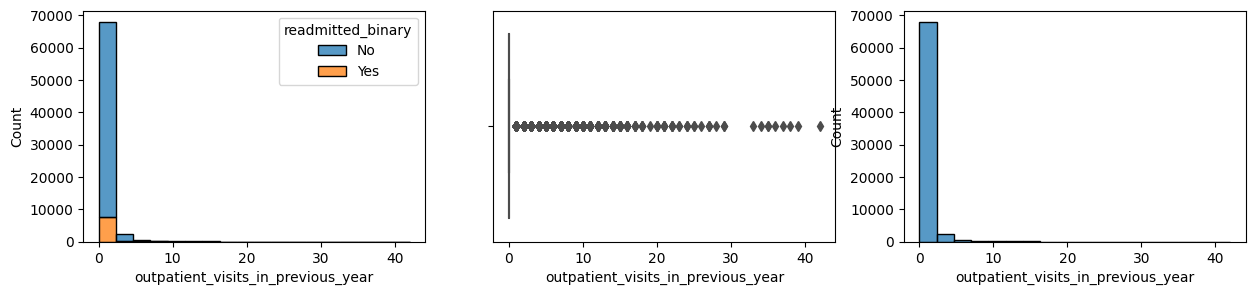

In [173]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = train, x = 'outpatient_visits_in_previous_year', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = train, x = 'outpatient_visits_in_previous_year', ax=ax[2])
sns.boxplot(data = train, x = 'outpatient_visits_in_previous_year', color = 'b', ax=ax[1])
fig.show()

<AxesSubplot: xlabel='outpatient_visits_in_previous_year', ylabel='Count'>

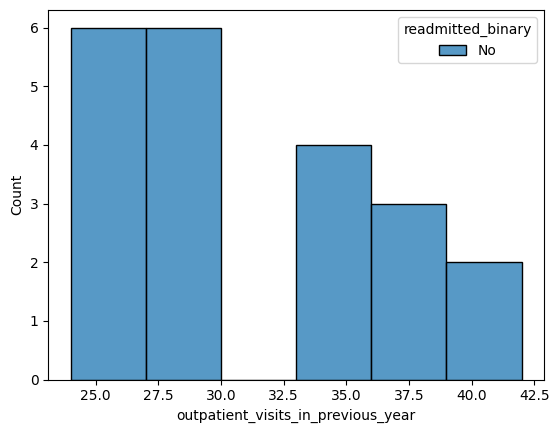

In [174]:
sns.histplot(data = df[df['outpatient_visits_in_previous_year']>=24], x = 'outpatient_visits_in_previous_year', hue = 'readmitted_binary', multiple= 'stack')

In [175]:
len(df[df['outpatient_visits_in_previous_year'] > 0])/len(df)

0.163526868437307

#### emergency_visits_in_previous_year

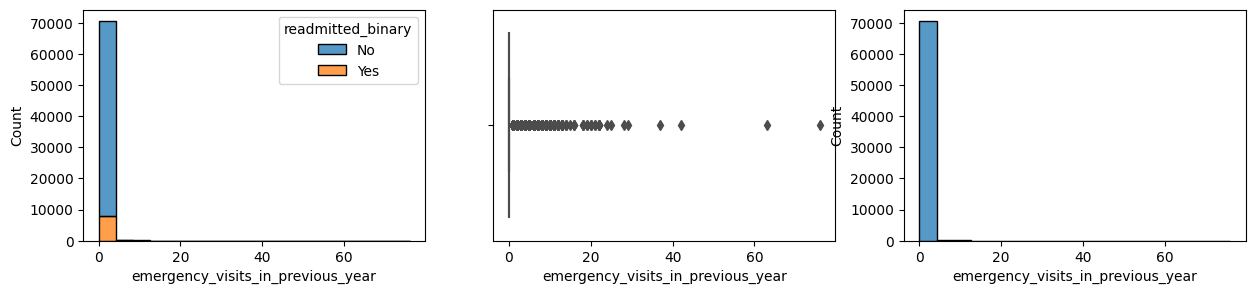

In [176]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = df, x = 'emergency_visits_in_previous_year', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = df, x = 'emergency_visits_in_previous_year', ax=ax[2])
sns.boxplot(data = df, x = 'emergency_visits_in_previous_year', color = 'b', ax=ax[1])
fig.show()

<AxesSubplot: xlabel='emergency_visits_in_previous_year', ylabel='Count'>

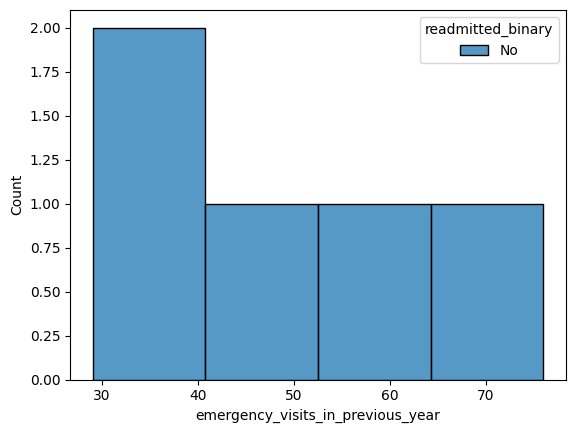

In [177]:
sns.histplot(data = df[df['emergency_visits_in_previous_year']>=29], x = 'emergency_visits_in_previous_year', hue = 'readmitted_binary', multiple= 'stack')

In [178]:
len(df[df['emergency_visits_in_previous_year'] > 0])/len(df)

0.11221854118704026

#### inpatient_visits_in_previous_year

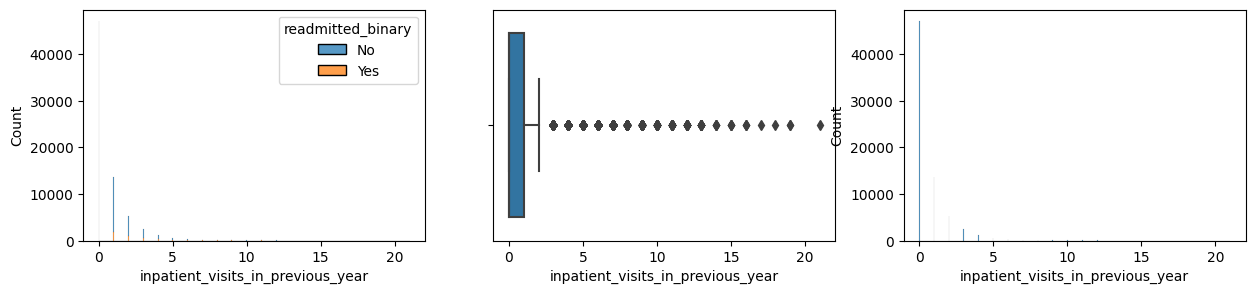

In [179]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = df, x = 'inpatient_visits_in_previous_year', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = df, x = 'inpatient_visits_in_previous_year', ax=ax[2])
sns.boxplot(data = df, x = 'inpatient_visits_in_previous_year', ax=ax[1])
fig.show()

<AxesSubplot: xlabel='inpatient_visits_in_previous_year', ylabel='Count'>

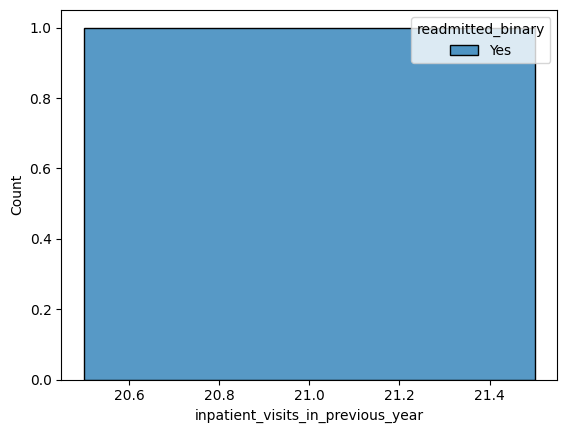

In [180]:
sns.histplot(data = df[df['inpatient_visits_in_previous_year']>=21], x = 'inpatient_visits_in_previous_year', hue = 'readmitted_binary', multiple= 'stack')

In [181]:
len(df[df['inpatient_visits_in_previous_year'] > 0])/len(df)

0.3369784940198776

#### average_pulse_bpm

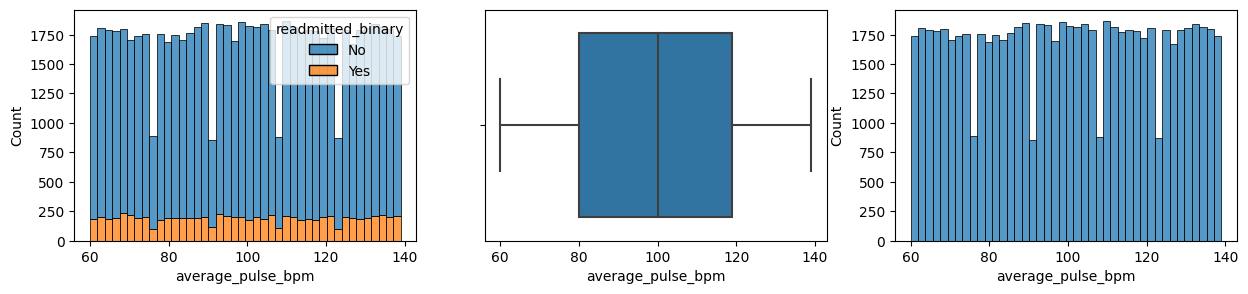

In [182]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = df, x = 'average_pulse_bpm', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = df, x = 'average_pulse_bpm', ax=ax[2])
sns.boxplot(data = df, x = 'average_pulse_bpm', ax=ax[1])
fig.show()

#### length_of_stay_in_hospital               

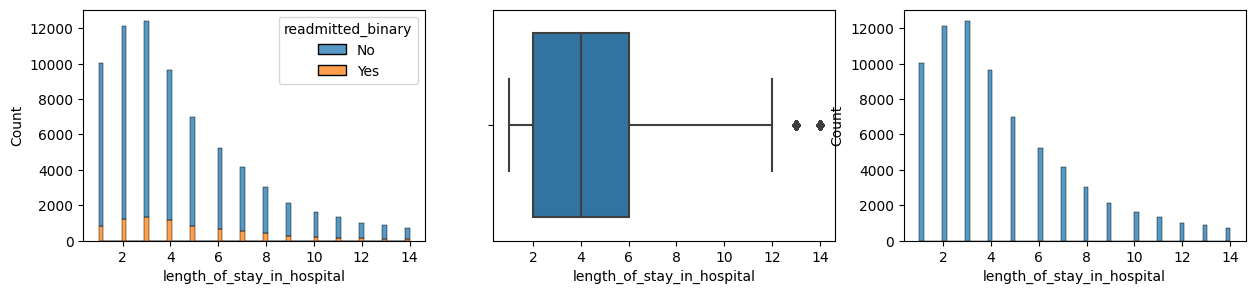

In [183]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = df, x = 'length_of_stay_in_hospital', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = df, x = 'length_of_stay_in_hospital', ax=ax[2])
sns.boxplot(data = df, x = 'length_of_stay_in_hospital', ax=ax[1])
fig.show()

#### number_lab_tests

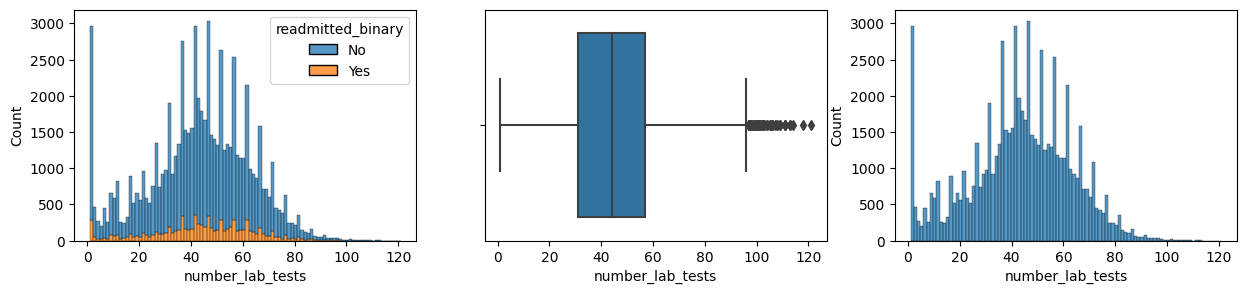

In [184]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = df, x = 'number_lab_tests', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = df, x = 'number_lab_tests', ax=ax[2])
sns.boxplot(data = df, x = 'number_lab_tests', ax=ax[1])
fig.show()

#### non_lab_procedures

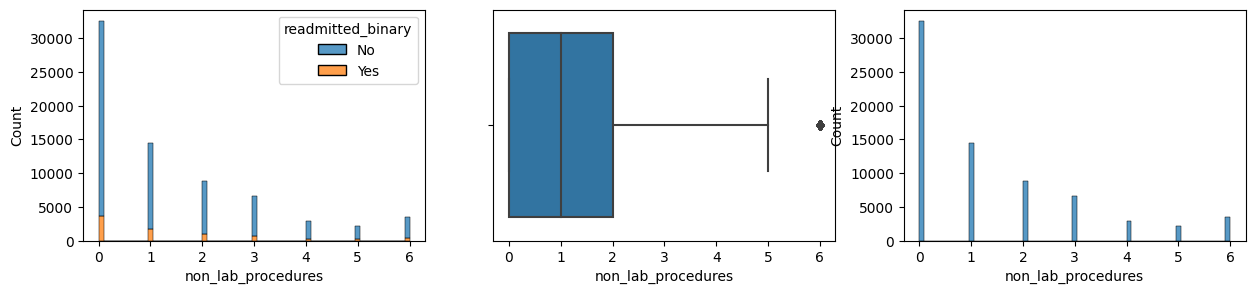

In [185]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = df, x = 'non_lab_procedures', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = df, x = 'non_lab_procedures', ax=ax[2])
sns.boxplot(data = df, x = 'non_lab_procedures',  ax=ax[1])
fig.show()

#### number_of_medications

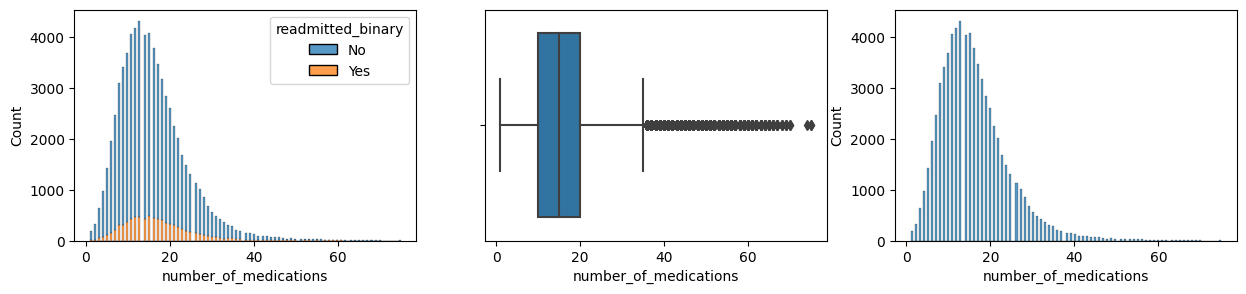

In [186]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = df, x = 'number_of_medications', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = df, x = 'number_of_medications', ax=ax[2])
sns.boxplot(data = df, x = 'number_of_medications', ax=ax[1])
fig.show()

<AxesSubplot: xlabel='number_of_medications', ylabel='Count'>

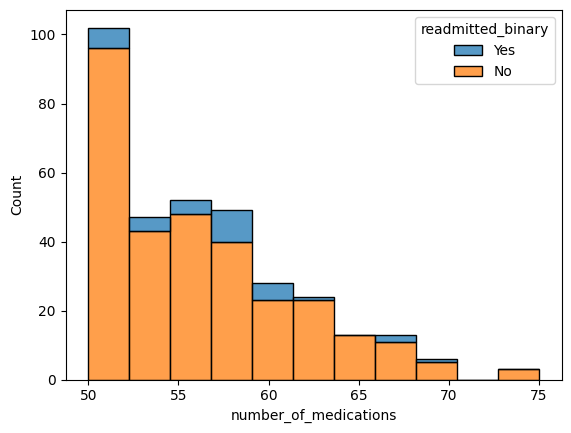

In [187]:
sns.histplot(data = df[df['number_of_medications']>=50], x = 'number_of_medications', hue = 'readmitted_binary', multiple= 'stack')

In [188]:
len(df[df['number_of_medications'] > 20])/len(df)

0.23322477399067887

#### number_diagnoses

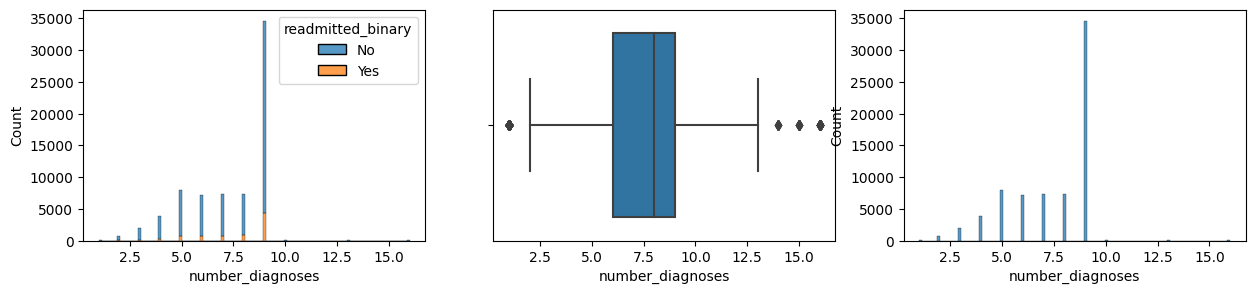

In [189]:
fig, ax =plt.subplots(1,3,figsize=(15, 3))
sns.histplot(data = df, x = 'number_diagnoses', hue = 'readmitted_binary', multiple= 'stack', ax=ax[0])
sns.histplot(data = df, x = 'number_diagnoses', ax=ax[2])
sns.boxplot(data = df, x = 'number_diagnoses', ax=ax[1])
fig.show()

### Categorical Features

#### race

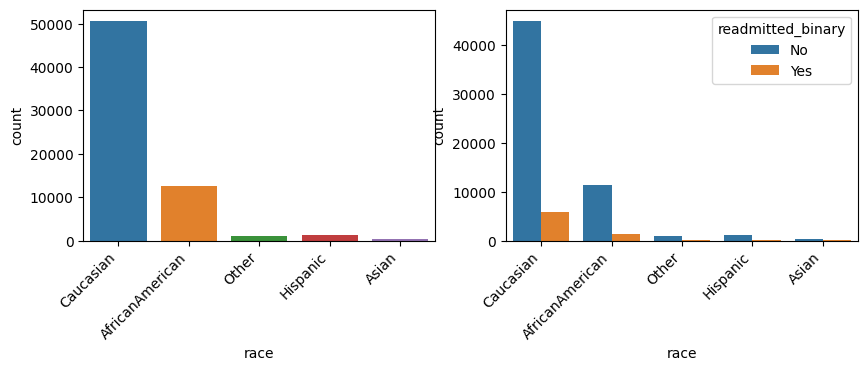

In [190]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'race', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'race', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### gender

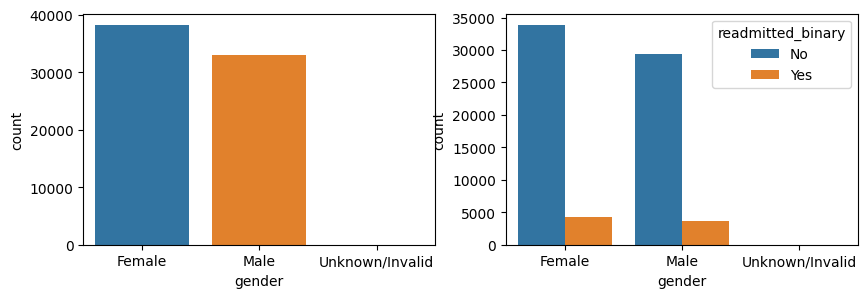

In [191]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'gender', ax=ax[0])
sns.countplot(data = df, x = 'gender', hue = 'readmitted_binary', ax=ax[1])
fig.show()

#### age

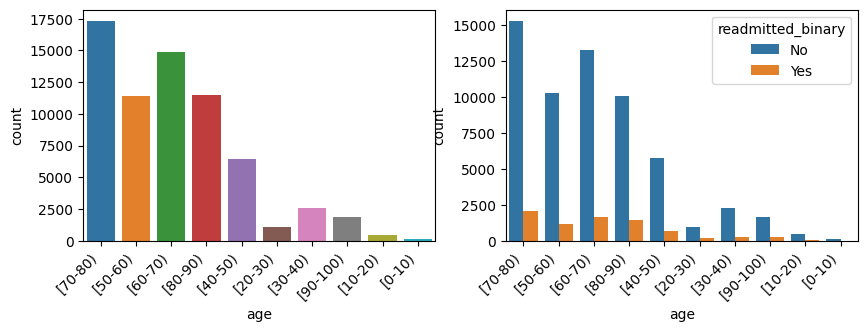

In [192]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'age', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'age', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### weight

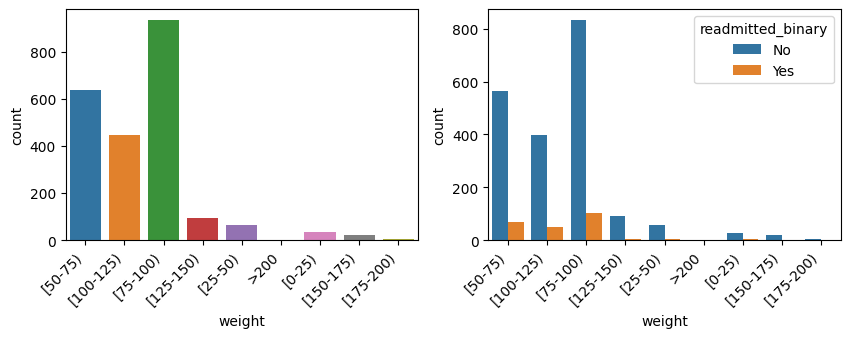

In [193]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'weight', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'weight', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### payer_code

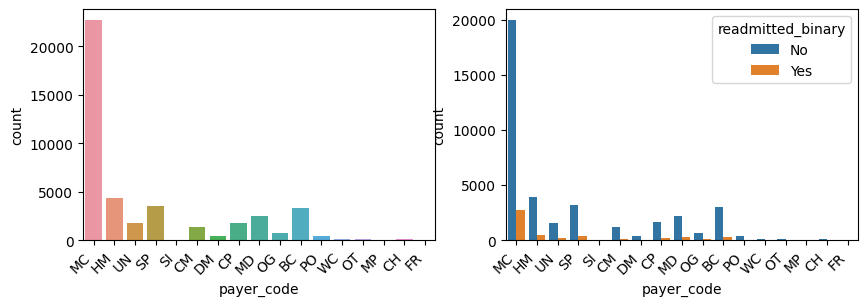

In [194]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'payer_code', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'payer_code', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### admission_type

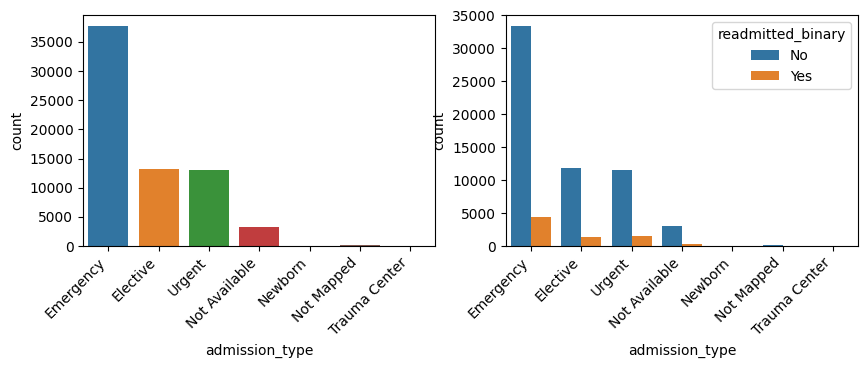

In [195]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'admission_type', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'admission_type', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### medical_specialty

In [196]:
df['medical_specialty'].value_counts(dropna = False)

medical_specialty
NaN                              34922
InternalMedicine                 10292
Emergency/Trauma                  5319
Family/GeneralPractice            5217
Cardiology                        3716
                                 ...  
Speech                               1
SportsMedicine                       1
Pediatrics-InfectiousDiseases        1
Proctology                           1
Neurophysiology                      1
Name: count, Length: 69, dtype: int64

#### discharge_disposition

In [197]:
df['discharge_disposition'].value_counts(dropna = False)

discharge_disposition
Discharged to home                                                                                           42256
Discharged/transferred to SNF                                                                                 9780
Discharged/transferred to home with home health service                                                       9005
NaN                                                                                                           2590
Discharged/transferred to another short term hospital                                                         1488
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1393
Expired                                                                                                       1135
Discharged/transferred to another type of inpatient care institution                                           822
Not Mapped                                                

#### admission_source

In [198]:
df['admission_source'].value_counts(dropna = False)

admission_source
 Emergency Room                                               40319
 Physician Referral                                           20678
NaN                                                            4718
Transfer from a hospital                                       2230
 Transfer from another health care facility                    1562
Clinic Referral                                                 779
 Transfer from a Skilled Nursing Facility (SNF)                 595
HMO Referral                                                    129
 Not Mapped                                                     107
 Not Available                                                   88
 Court/Law Enforcement                                           11
 Transfer from hospital inpt/same fac reslt in a sep claim        8
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
 Extramural Birth              

#### primary_diagnosis

In [199]:
df['primary_diagnosis'].value_counts(dropna = False)

primary_diagnosis
428    4776
414    4596
786    2846
410    2513
486    2488
       ... 
412       1
375       1
147       1
422       1
299       1
Name: count, Length: 687, dtype: int64

#### secondary_diagnosis

In [200]:
df['secondary_diagnosis'].value_counts(dropna = False)

secondary_diagnosis
276     4694
428     4685
250     4257
427     3537
401     2624
        ... 
658        1
610        1
908        1
46         1
E968       1
Name: count, Length: 699, dtype: int64

#### additional_diagnosis

In [201]:
df['additional_diagnosis'].value_counts(dropna = False)

additional_diagnosis
250      8070
401      5784
276      3599
428      3240
427      2767
         ... 
250.3       1
930         1
811         1
E883        1
669         1
Name: count, Length: 747, dtype: int64

#### glucose_test_result

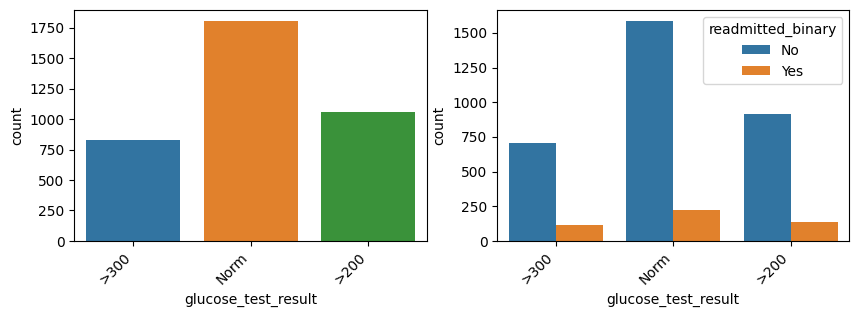

In [202]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'glucose_test_result', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'glucose_test_result', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### a1c_test_result

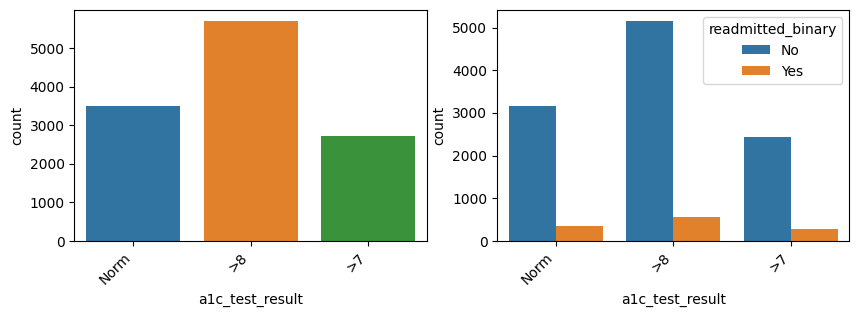

In [203]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'a1c_test_result', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'a1c_test_result', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### change_in_meds_during_hospitalization

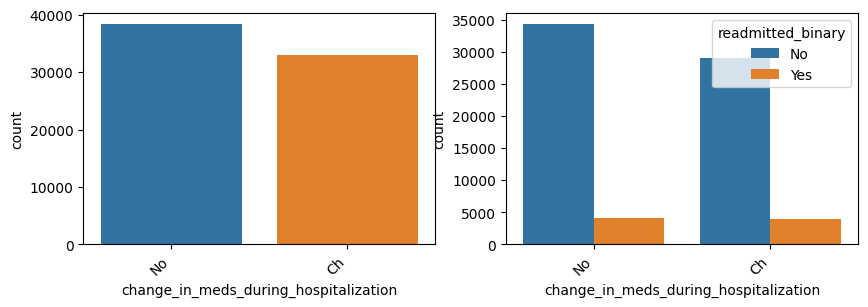

In [204]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'change_in_meds_during_hospitalization', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'change_in_meds_during_hospitalization', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### prescribed_diabetes_meds

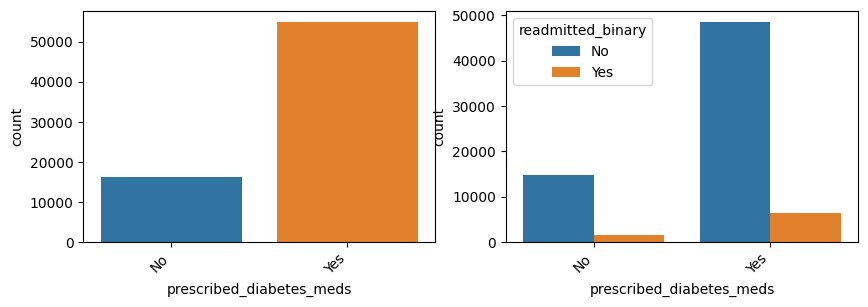

In [205]:
fig, ax =plt.subplots(1,2,figsize=(10, 3))
sns.countplot(data = df, x = 'prescribed_diabetes_meds', ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
sns.countplot(data = df, x = 'prescribed_diabetes_meds', hue = 'readmitted_binary', ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light')
ax[1].legend(title='readmitted_binary')
fig.show()

#### medication

In [206]:
df['medication'].value_counts(dropna = False)

medication
['insulin']                                                       21715
[]                                                                16346
['metformin']                                                      3152
['metformin', 'insulin']                                           3041
['glipizide']                                                      2727
                                                                  ...  
['pioglitazone', 'acarbose', 'insulin', 'glyburide-metformin']        1
['glimepiride', 'rosiglitazone', 'acarbose']                          1
['glipizide', 'pioglitazone', 'acarbose', 'insulin']                  1
['metformin', 'glyburide', 'acarbose', 'insulin']                     1
['glimepiride', 'rosiglitazone', 'miglitol', 'insulin']               1
Name: count, Length: 303, dtype: int64

#### readmitted_binary

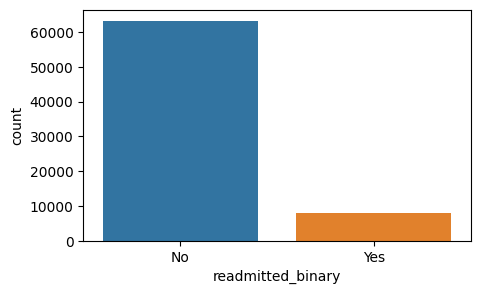

In [207]:
fig, ax =plt.subplots(1,1,figsize=(5, 3))
sns.countplot(data = df, x = 'readmitted_binary')
fig.show()

#### readmitted_multiclass

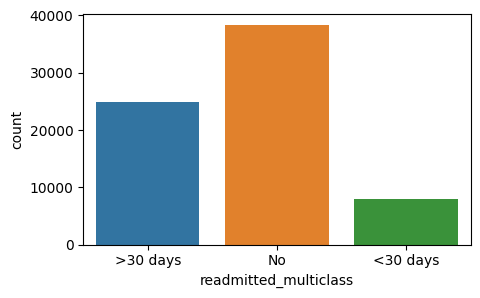

In [208]:
fig, ax =plt.subplots(1,1,figsize=(5, 3))
sns.countplot(data = df, x = 'readmitted_multiclass')
fig.show()

#### patient_id

In [209]:
train["patient_id"]

encounter_id
533253       70110
426224    29775006
634063    80729253
890610     2919042
654194    84871971
            ...   
660160    24531381
826429     4663818
332030    23397147
757560    52161750
459757    88410897
Name: patient_id, Length: 71236, dtype: int64

In [210]:
repeated_values = train['patient_id'].value_counts()
repeated_values = repeated_values[repeated_values > 1]
print(repeated_values)

patient_id
88785891     33
1660293      19
84428613     18
37096866     17
23199021     15
             ..
105797601     2
3446118       2
105263262     2
109114137     2
59142753      2
Name: count, Length: 10559, dtype: int64


In [211]:
train[(train['discharge_disposition']=="Hospice / home") & (train["readmitted_binary"]=="Yes")]

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
369573,USA,93854601,Caucasian,Male,[80-90),[50-75),CM,0,0,0,...,784,E934,9,NaN,NaN,No,No,[],Yes,<30 days
317759,USA,8767800,Caucasian,Male,[70-80),NaN,NaN,0,0,0,...,428,426,7,NaN,NaN,No,Yes,['glyburide'],Yes,<30 days
969527,USA,12811878,Caucasian,Female,[80-90),NaN,NaN,12,2,6,...,518,585,9,NaN,NaN,No,Yes,['insulin'],Yes,<30 days
244648,USA,95075865,Caucasian,Male,[60-70),NaN,MD,3,4,0,...,599,198,9,NaN,NaN,Ch,Yes,['insulin'],Yes,<30 days
936958,USA,23717187,AfricanAmerican,Female,[90-100),NaN,MC,0,1,2,...,425,V66,6,NaN,NaN,No,Yes,['metformin'],Yes,<30 days
516866,USA,34301979,Caucasian,Male,[70-80),NaN,MC,0,1,1,...,707,263,9,NaN,NaN,No,No,[],Yes,<30 days
252583,USA,95060412,Caucasian,Female,[80-90),NaN,MC,0,0,0,...,789,332,9,NaN,NaN,No,Yes,['insulin'],Yes,<30 days
660381,USA,66776904,Caucasian,Female,[70-80),NaN,NaN,0,0,3,...,428,403,9,NaN,NaN,No,Yes,['glyburide'],Yes,<30 days
679728,USA,111138912,AfricanAmerican,Male,[60-70),NaN,NaN,0,0,1,...,157,199,8,NaN,NaN,Ch,Yes,"['pioglitazone', 'insulin']",Yes,<30 days


In [212]:
train[train["readmitted_binary"]=="Yes"]

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
345921,USA,63536886,Caucasian,Male,[80-90),NaN,NaN,0,0,0,...,403,428,7,NaN,NaN,Ch,Yes,"['glipizide', 'insulin']",Yes,<30 days
873304,USA,23492133,AfricanAmerican,Female,[60-70),NaN,NaN,0,0,0,...,403,496,8,NaN,NaN,No,No,[],Yes,<30 days
102821,USA,30520872,Caucasian,Female,[60-70),NaN,MC,0,0,1,...,682,428,9,NaN,NaN,Ch,Yes,['insulin'],Yes,<30 days
844139,USA,24854895,Caucasian,Male,NaN,NaN,NaN,0,0,1,...,491,682,9,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
825255,USA,3509442,Caucasian,Male,[50-60),NaN,NaN,0,0,1,...,996,433,9,NaN,NaN,No,No,[],Yes,<30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259379,USA,29662614,Caucasian,Female,[60-70),NaN,MC,4,0,0,...,518,569,9,NaN,NaN,Ch,Yes,"['metformin', 'pioglitazone', 'insulin']",Yes,<30 days
631066,USA,24858882,Caucasian,Male,[70-80),NaN,MC,0,0,0,...,276,536,9,NaN,NaN,Ch,Yes,"['metformin', 'insulin']",Yes,<30 days
397846,USA,57184236,Caucasian,Female,[80-90),NaN,MC,0,0,2,...,434,250.02,9,NaN,NaN,No,Yes,['insulin'],Yes,<30 days


In [213]:
train[(train['glucose_test_result']==">300")& (train["readmitted_binary"]=="Yes")]

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
844139,USA,24854895,Caucasian,Male,NaN,NaN,NaN,0,0,1,...,491,682,9,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
844722,USA,23619924,Caucasian,Female,[70-80),NaN,NaN,0,0,0,...,401,250,4,>300,NaN,Ch,Yes,"['metformin', 'pioglitazone', 'insulin']",Yes,<30 days
335808,USA,23661198,Caucasian,Male,[50-60),NaN,MC,1,0,0,...,428,424,9,>300,NaN,Ch,Yes,"['metformin', 'glipizide', 'rosiglitazone', 'i...",Yes,<30 days
283073,USA,25841151,AfricanAmerican,Male,[40-50),NaN,NaN,1,0,0,...,250.03,401,6,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
333098,USA,24209856,Caucasian,Female,NaN,NaN,MD,0,1,3,...,70,303,8,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578889,USA,25869789,Caucasian,Male,NaN,NaN,NaN,1,2,0,...,491,276,7,>300,NaN,Ch,Yes,"['glipizide', 'insulin']",Yes,<30 days
864300,USA,23643405,Caucasian,Female,[20-30),NaN,HM,0,4,13,...,250.41,578,7,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days
846465,USA,24269553,Caucasian,Male,NaN,NaN,NaN,1,3,1,...,250.01,278,9,>300,NaN,Ch,Yes,['insulin'],Yes,<30 days


In [214]:
train[(train['glucose_test_result']=="Norm")& (train["readmitted_binary"]=="Yes")]

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
891370,USA,23382351,Caucasian,Female,[80-90),NaN,MC,2,0,0,...,401,250,4,Norm,NaN,Ch,Yes,"['glyburide', 'insulin']",Yes,<30 days
754155,USA,54026280,Hispanic,Female,[60-70),NaN,NaN,0,0,0,...,562,535,6,Norm,NaN,No,No,[],Yes,<30 days
925506,USA,95930262,Caucasian,Female,[70-80),NaN,NaN,0,0,1,...,780,780,6,Norm,NaN,No,Yes,['glyburide'],Yes,<30 days
593152,USA,23512842,Caucasian,Female,[80-90),NaN,NaN,0,0,2,...,428,496,9,Norm,NaN,Ch,Yes,['insulin'],Yes,<30 days
732548,USA,99421578,Caucasian,Female,[90-100),NaN,HM,1,1,0,...,578,427,9,Norm,NaN,No,No,[],Yes,<30 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802711,USA,4778442,AfricanAmerican,Female,[70-80),NaN,NaN,0,0,0,...,250,401,3,Norm,NaN,No,Yes,['insulin'],Yes,<30 days
289939,USA,23393988,Caucasian,Male,[70-80),NaN,NaN,3,0,1,...,511,496,8,Norm,NaN,No,Yes,['glipizide'],Yes,<30 days
819403,USA,23378175,Caucasian,Female,[50-60),NaN,NaN,0,0,0,...,276,465,8,Norm,NaN,No,Yes,['metformin'],Yes,<30 days


In [215]:
# fazer feature dos pacientes q repetem mais dq 1 vez no hospital
# transformar as features de glucose test e de a1c test > 200 e > 300 para 1 e Norm para 0
# criar feature se tem peso ou n

## 3. Incoherences check

In [216]:
# Newborns with incorrect ages

age_to_exclude = ['[70-80)', '[50-60)', '[60-70)', '[80-90)', '[40-50)', '[20-30)', '[30-40)', '[90-100)', '[10-20)']

train = train.drop(train[(train["admission_type"] == "Newborn") & (train["age"].isin(age_to_exclude))].index)

In [217]:
# We will group the discharge_disposition later, so we decided to drop discharge_disposition with Expired

discharge_to_exclude = [
    'Expired',
    'Expired at home. Medicaid only, hospice.',
    'Expired in a medical facility. Medicaid only, hospice.'
]

train = train[~train['discharge_disposition'].isin(discharge_to_exclude)]

In [218]:
# Drop the gender with "Unknown/Invalid"

train = train[train['gender'] != "Unknown/Invalid"]

In [219]:
# Drop the Sick Baby and Extramural Birth with incorrect age

train = train[train['admission_source']!=" Sick Baby"]
train = train[train['admission_source']!=' Extramural Birth']

In [220]:
train.shape[0]/71236

0.9838284013700938

# Outliers

In [221]:
numerical_features = ['outpatient_visits_in_previous_year', 'emergency_visits_in_previous_year', 'inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']
categorical_features = train.columns.drop(numerical_features).to_list()

In [222]:
train[numerical_features].kurt() # a distribuição normal pela kurtose é evbidenciada quando a mesma é 3
# pelo que só vamos tomar atenção a valores superiores a 3 (n vemos o "number_od_medications" pq é mt proximo de 3 e é quase uma distribuição normal)

outpatient_visits_in_previous_year     154.037224
emergency_visits_in_previous_year     1210.468503
inpatient_visits_in_previous_year       20.386848
average_pulse_bpm                       -1.189798
length_of_stay_in_hospital               0.862472
number_lab_tests                        -0.264841
non_lab_procedures                       0.887171
number_of_medications                    3.512509
number_diagnoses                        -0.097114
dtype: float64

In [223]:
train[(train["outpatient_visits_in_previous_year"]>22) & (train["readmitted_binary"]=="Yes")] # threshold = maior q 23

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
472104,USA,1978605,Caucasian,Female,[50-60),NaN,NaN,23,0,2,...,997,250.02,9,NaN,NaN,Ch,Yes,['insulin'],Yes,<30 days


In [224]:
train[(train["inpatient_visits_in_previous_year"]>20) & (train["readmitted_binary"]=="Yes")] # threshold = maior q 21

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
357915,USA,4790016,Caucasian,Female,[20-30),[50-75),MC,0,1,21,...,577,309,7,NaN,NaN,No,Yes,['insulin'],Yes,<30 days


In [225]:
train[(train["emergency_visits_in_previous_year"]>27) & (train["readmitted_binary"]=="Yes")] # threshold = maior q 28

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
641150,USA,5539599,Caucasian,Male,[50-60),NaN,NaN,2,28,5,...,682,844,6,NaN,>7,No,No,[],Yes,<30 days


In [226]:
train[(train["number_of_medications"]>69) & (train["readmitted_binary"]=="Yes")] # threshold = maior q 70

,country,patient_id,race,gender,age,weight,payer_code,outpatient_visits_in_previous_year,emergency_visits_in_previous_year,inpatient_visits_in_previous_year,...,secondary_diagnosis,additional_diagnosis,number_diagnoses,glucose_test_result,a1c_test_result,change_in_meds_during_hospitalization,prescribed_diabetes_meds,medication,readmitted_binary,readmitted_multiclass
encounter_id,,,,,,,,,,,,,,,,,,,,,
128311,USA,25162767,AfricanAmerican,Female,[50-60),NaN,SP,0,0,0,...,584,427,9,NaN,NaN,Ch,Yes,['insulin'],Yes,<30 days


In [227]:
# Alteração ao dataset ( remover outliers )

# Basicamente aqui aplicamos o método windsorizing manualmente, dps das análises gráficas ( explicar o que faz este método no report )

# aplicamos manuamente ºpq neste projeto a dificuldade é descobrir quem volta e aplicando os thresholds escolhidos conseguimos treinar melhor o modelo para esse aspeto

train.loc[train["outpatient_visits_in_previous_year"]>23, "outpatient_visits_in_previous_year"] = 24

train.loc[train["inpatient_visits_in_previous_year"]>21, "inpatient_visits_in_previous_year"] = 22

train.loc[train["emergency_visits_in_previous_year"]>28, "emergency_visits_in_previous_year"] = 29

## 4. Missing Values

In [228]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                      4989
gender                                       0
age                                       3506
weight                                   67869
payer_code                               27750
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                            3659
medical_specialty                        34339
average_pulse_bpm                            0
discharge_disposition                     2590
admission_source                          4630
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                           16
secondary_diagnosis                        262
additional_di

In [229]:
# We will keep "race" and fill the missing values with mode

train["race"].value_counts()

race
Caucasian          49862
AfricanAmerican    12483
Hispanic            1351
Other                983
Asian                416
Name: count, dtype: int64

In [230]:
# We will keep "age" and fill the missing values with mode

train["age"].value_counts()

age
[70-80)     17016
[60-70)     14704
[50-60)     11321
[80-90)     11183
[40-50)      6382
[30-40)      2529
[90-100)     1799
[20-30)      1067
[10-20)       473
[0-10)        104
Name: count, dtype: int64

In [231]:
# We will drop "weight" but we are doing a binary feature as missing values or not

In [232]:
# https://www.mass.gov/doc/hsn-payer-code-list20130118pdf/download
# Payer_Code -> Code of the health insurance provider (if there is one)
# So this Nan values we need to input with SP = Self Payed

train["payer_code"].value_counts()

payer_code
MC    22202
HM     4279
SP     3503
BC     3270
MD     2453
CP     1732
UN     1713
CM     1326
OG      721
PO      400
DM      375
CH      101
WC       99
OT       60
MP       54
SI       45
FR        1
Name: count, dtype: int64

In [233]:
# We will keep "admission_type" and fill the missing values with mode

train["admission_type"].value_counts()

admission_type
Emergency        36973
Elective         13115
Urgent           12848
Not Available     3262
Not Mapped         214
Trauma Center       12
Newborn              1
Name: count, dtype: int64

In [234]:
# We will keep "medical_specialty" and fill the missing values with "Other"

train["medical_specialty"].value_counts()

medical_specialty
InternalMedicine                 10090
Emergency/Trauma                  5237
Family/GeneralPractice            5122
Cardiology                        3675
Surgery-General                   2120
                                 ...  
SportsMedicine                       1
Pediatrics-InfectiousDiseases        1
Proctology                           1
Pediatrics-EmergencyMedicine         1
Neurophysiology                      1
Name: count, Length: 68, dtype: int64

In [235]:
# We will keep "discharge_disposition" and fill the missing values with mode

train["discharge_disposition"].value_counts()

discharge_disposition
Discharged to home                                                                                           42249
Discharged/transferred to SNF                                                                                 9780
Discharged/transferred to home with home health service                                                       9003
Discharged/transferred to another short term hospital                                                         1488
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1392
Discharged/transferred to another type of inpatient care institution                                           822
Not Mapped                                                                                                     679
Discharged/transferred to ICF                                                                                  571
Left AMA                                                  

In [236]:
# We will keep "admission_source" and fill the missing values with mode

train["admission_source"].value_counts()

admission_source
 Emergency Room                                               39534
 Physician Referral                                           20505
Transfer from a hospital                                       2188
 Transfer from another health care facility                    1545
Clinic Referral                                                 767
 Transfer from a Skilled Nursing Facility (SNF)                 566
HMO Referral                                                    127
 Not Mapped                                                     106
 Not Available                                                   88
 Court/Law Enforcement                                           10
 Transfer from hospital inpt/same fac reslt in a sep claim        8
 Transfer from critial access hospital                            7
 Transfer from Ambulatory Surgery Center                          2
Normal Delivery                                                   1
Name: count, dtype: int64

In [237]:
# We will keep "primary_diagnosis" and fill the missing values with mode

train["primary_diagnosis"].value_counts()

primary_diagnosis
428    4683
414    4573
786    2846
410    2418
486    2416
       ... 
147       1
422       1
219       1
875       1
299       1
Name: count, Length: 684, dtype: int64

In [238]:
# We will keep "secondary_diagnosis" and fill the missing values with "primary_diagnosis" mode to keep consistency

train["secondary_diagnosis"].value_counts()

secondary_diagnosis
276     4622
428     4596
250     4247
427     3458
401     2617
        ... 
916        1
833        1
E868       1
944        1
E968       1
Name: count, Length: 697, dtype: int64

In [239]:
# We will keep "additional_diagnosis" and fill the missing values with "primary_diagnosis" mode to keep consistency

train["additional_diagnosis"].value_counts()

additional_diagnosis
250     8027
401     5747
276     3495
428     3160
427     2684
        ... 
E892       1
602        1
164        1
597        1
669        1
Name: count, Length: 744, dtype: int64

In [240]:
# We will drop 'glucose_test_result' and 'a1c_test_result' but we are doing a binary feature as missing values or not

In [241]:
# race

train["race"] = train["race"].replace(np.nan, train["race"].mode()[0])
test["race"] = test["race"].replace(np.nan, test["race"].mode()[0])

# age

train["age"] = train["age"].replace(np.nan, train["age"].mode()[0])
test["age"] = test["age"].replace(np.nan, test["age"].mode()[0])

# payer_code

train["payer_code"] = train["payer_code"].replace(np.nan, "SP")
test["payer_code"] = test["payer_code"].replace(np.nan, "SP")

# admission_type

train["admission_type"] = train["admission_type"].replace(np.nan, "Not Available")
test["admission_type"] = test["admission_type"].replace(np.nan, "Not Available")

# medical_specialty

train["medical_specialty"] = train["medical_specialty"].replace(np.nan, "Other")
test["medical_specialty"] = test["medical_specialty"].replace(np.nan, "Other")

# discharge_disposition

train["discharge_disposition"] = train["discharge_disposition"].replace(np.nan, "Not Available")
test["discharge_disposition"] = test["discharge_disposition"].replace(np.nan, "Not Available")

# admission_source

train["admission_source"] = train["admission_source"].replace(np.nan, "Not Available")
test["admission_source"] = test["admission_source"].replace(np.nan, "Not Available")

# primary_diagnosis

train["primary_diagnosis"] = train["primary_diagnosis"].replace(np.nan, train["primary_diagnosis"].mode()[0])
test["primary_diagnosis"] = test["primary_diagnosis"].replace(np.nan, test["primary_diagnosis"].mode()[0])

# secondary_diagnosis

train["secondary_diagnosis"] = train["secondary_diagnosis"].replace(np.nan, train["secondary_diagnosis"].mode()[0])
test["secondary_diagnosis"] = test["secondary_diagnosis"].replace(np.nan, test["secondary_diagnosis"].mode()[0])

# additional_diagnosis

train["additional_diagnosis"] = train["additional_diagnosis"].replace(np.nan, train["additional_diagnosis"].mode()[0])
test["additional_diagnosis"] = test["additional_diagnosis"].replace(np.nan, test["additional_diagnosis"].mode()[0])

In [242]:
train.loc[353655]

country                                                  USA
patient_id                                          28219392
race                                               Caucasian
gender                                                Female
age                                                  [60-70)
weight                                             [100-125)
payer_code                                                MC
outpatient_visits_in_previous_year                         1
emergency_visits_in_previous_year                          0
inpatient_visits_in_previous_year                          0
admission_type                                        Urgent
medical_specialty                           InternalMedicine
average_pulse_bpm                                        121
discharge_disposition                     Discharged to home
admission_source                          Physician Referral
length_of_stay_in_hospital                                 3
number_lab_tests        

In [243]:
test["primary_diagnosis"].value_counts()

primary_diagnosis
428    2091
414    1985
786    1170
410    1101
486    1020
       ... 
804       1
990       1
833       1
653       1
867       1
Name: count, Length: 594, dtype: int64

In [244]:
train.isna().sum()

country                                      0
patient_id                                   0
race                                         0
gender                                       0
age                                          0
weight                                   67869
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                               0
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                        0
admission_source                             0
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_di

In [245]:
test.isna().sum()

country                                      0
patient_id                                   0
race                                         0
gender                                       0
age                                          0
weight                                   29579
payer_code                                   0
outpatient_visits_in_previous_year           0
emergency_visits_in_previous_year            0
inpatient_visits_in_previous_year            0
admission_type                               0
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                        0
admission_source                             0
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_di

## 5. Feature Engineering

In [246]:
# Log transforamtion to get better distributions

In [247]:
train['log_outpatient_visits_in_previous_year'] = np.log1p(train['outpatient_visits_in_previous_year'])
test['log_outpatient_visits_in_previous_year'] = np.log1p(test['outpatient_visits_in_previous_year'])

In [248]:
train['log_emergency_visits_in_previous_year'] = np.log1p(train['emergency_visits_in_previous_year'])
test['log_emergency_visits_in_previous_year'] = np.log1p(test['emergency_visits_in_previous_year'])

In [249]:
train['log_inpatient_visits_in_previous_year'] = np.log1p(train['inpatient_visits_in_previous_year'])
test['log_inpatient_visits_in_previous_year'] = np.log1p(test['inpatient_visits_in_previous_year'])

In [250]:
# "visits_in_previous_year" -> sum of all patient visit in previous year

train["visits_in_previous_year"] = train["outpatient_visits_in_previous_year"] + train["emergency_visits_in_previous_year"] + train["inpatient_visits_in_previous_year"]
test["visits_in_previous_year"] = test["outpatient_visits_in_previous_year"] + test["emergency_visits_in_previous_year"] + test["inpatient_visits_in_previous_year"]

In [251]:
train.isna().sum()

country                                       0
patient_id                                    0
race                                          0
gender                                        0
age                                           0
weight                                    67869
payer_code                                    0
outpatient_visits_in_previous_year            0
emergency_visits_in_previous_year             0
inpatient_visits_in_previous_year             0
admission_type                                0
medical_specialty                             0
average_pulse_bpm                             0
discharge_disposition                         0
admission_source                              0
length_of_stay_in_hospital                    0
number_lab_tests                              0
non_lab_procedures                            0
number_of_medications                         0
primary_diagnosis                             0
secondary_diagnosis                     

In [252]:
# "'medication_'+mclass" -> all medications in binary features

train['medication'] = train['medication'].apply(lambda x: ast.literal_eval(x))

test['medication'] = test['medication'].apply(lambda x: ast.literal_eval(x))

med_list = []
for i in range(len(train)):
    med_list.append(train.medication.iloc[i])

med_classes = np.unique([num for elem in med_list for num in elem])

for mclass in med_classes:
    train['medication_'+mclass] = train['medication'].apply(lambda x: 1 if mclass in x else 0)

    test['medication_'+mclass] = test['medication'].apply(lambda x: 1 if mclass in x else 0)


In [253]:
# make a feature named weight filling missing values with mode

In [254]:
# 'weight_bin' -> binary feature 1 if the patient has weight record else 0

train['weight_bin'] = train['weight'].notna().astype(int)

test['weight_bin'] = test['weight'].notna().astype(int)

In [255]:
# "test_result" -> 1 if respects the conditions else 0

conditions_train = (
    (train['a1c_test_result'] == '>7') |
    (train['a1c_test_result'] == '>8') |
    (train['glucose_test_result'] == '>200') |
    (train['glucose_test_result'] == '>300')
)

train['test_result'] = conditions_train.astype(int)

conditions_test = (
    (test['a1c_test_result'] == '>7') |
    (test['a1c_test_result'] == '>8') |
    (test['glucose_test_result'] == '>200') |
    (test['glucose_test_result'] == '>300')
)

test['test_result'] = conditions_test.astype(int)

In [256]:
# "regular patient" -> 1 if patient_id is repeated in the data else 0

train['regular_patient'] = train.groupby('patient_id')['patient_id'].transform('count') > 1
train['regular_patient'] = train['regular_patient'].astype(int)

test['regular_patient'] = test.groupby('patient_id')['patient_id'].transform('count') > 1
test['regular_patient'] = test['regular_patient'].astype(int)

In [257]:
# "gender_bin" -> 1 if its Female else 0

train['gender_bin'] = (train['gender'] == 'Female').astype(int)

test['gender_bin'] = (test['gender'] == 'Female').astype(int)

In [258]:
# "change_in_meds_during_hospitalization_bin" -> 1 if it changes else 0

train['change_in_meds_during_hospitalization_bin'] = (train['change_in_meds_during_hospitalization'] == 'Ch').astype(int)

test['change_in_meds_during_hospitalization_bin'] = (test['change_in_meds_during_hospitalization'] == 'Ch').astype(int)

In [259]:
# "prescribed_diabetes_meds_bin" -> 1 if it has meds else 0

train['prescribed_diabetes_meds_bin'] = (train['prescribed_diabetes_meds'] == 'Yes').astype(int)

test['prescribed_diabetes_meds_bin'] = (test['prescribed_diabetes_meds'] == 'Yes').astype(int)

In [260]:
# "readmitted_binary" -> 1 if it Yes else 0

train['readmitted_binary'] = (train['readmitted_binary'] == 'Yes').astype(int)

In [261]:
# Drop irrelevant features

features_to_drop = ["country", "patient_id", "gender", "weight", "medication", "glucose_test_result", "a1c_test_result", "change_in_meds_during_hospitalization","prescribed_diabetes_meds","outpatient_visits_in_previous_year", "emergency_visits_in_previous_year", "inpatient_visits_in_previous_year"]

train = train.drop(features_to_drop, axis=1)
test = test.drop(features_to_drop, axis=1)

## 6. Mapping and Encoding

In [262]:
# Mapping race

race_mapping = {
    'Caucasian': 0,
    'AfricanAmerican': 1,
    'Hispanic': 2,
    'Other': 3,
    'Asian': 4
}

train['race'] = train['race'].map(race_mapping)

test['race'] = test['race'].map(race_mapping)

In [263]:
# Mapping "age"

age_mapping = {"[0-10)": 5,
               '[10-20)': 15,
               '[20-30)': 25,
               '[30-40)': 35,
               '[40-50)': 45,
               '[50-60)': 55,
               '[60-70)': 65,
               '[70-80)': 75,
               '[80-90)': 85,
               '[90-100)': 95}

train['age'] = train['age'].map(age_mapping)

test['age'] = test['age'].map(age_mapping)

In [264]:
train["payer_code"].value_counts()

payer_code
SP    31253
MC    22202
HM     4279
BC     3270
MD     2453
CP     1732
UN     1713
CM     1326
OG      721
PO      400
DM      375
CH      101
WC       99
OT       60
MP       54
SI       45
FR        1
Name: count, dtype: int64

In [265]:
# Mapping payer_code
# https://www.mass.gov/doc/hsn-payer-code-list20130118pdf/download

payer_code_mapping = {"SP": 0,
              "MC": 1,
              "HM": 2,
              "BC": 3,
              "MD": 4,
              "CP": 5,
              "UN": 6,
              "CM": 7,
              "OG": 8,
              "PO": 8,
              "DM": 8,
              "CH": 8,
              "WC": 8,
              "OT": 8,
              "MP": 8,
              "SI": 8,
              "FR": 8}

train['payer_code'] = train['payer_code'].map(payer_code_mapping)

test['payer_code'] = test['payer_code'].map(payer_code_mapping)

In [266]:
train["admission_type"].value_counts()

admission_type
Emergency        36973
Elective         13115
Urgent           12848
Not Available     6921
Not Mapped         214
Trauma Center       12
Newborn              1
Name: count, dtype: int64

In [267]:
# Mapping admission_type

admission_type_mapping = {
                          "Emergency": 0,
                          "Elective": 1,
                          "Urgent": 2,
                          "Not Available": 3,
                          "Not Mapped": 3,
                          "Trauma Center": 4,
                          "Newborn": 5,
                          }

train['admission_type'] = train['admission_type'].map(admission_type_mapping)

test['admission_type'] = test['admission_type'].map(admission_type_mapping)

In [268]:
# Mapping medical_specialty
# https://run.unl.pt/bitstream/10362/145706/1/TGI1636.pdf

# AllergyandImmunology -> Allergy and Immunology = 0
# Pathology -> Anatomic and Clinical Pathology = 1
# Anesthesiology, Anesthesiology-Pediatric -> Anesthesiology = 2
# Dermatology -> Dermatology = 3
# Radiologist, Radiology -> Diagnostic Radiology = 4
# Emergency, Trauma -> Emergency Medicine = 5
# Family, GeneralPractice -> Family, GeneralPractice = 6
# Surgery-PlasticwithinHeadandNeck, Surgeon, Surgery-Cardiovascular, Surgery-Cardiovascular/Thoracic, SurgeryColon&Rectal, Surgery-General, Surgery-Maxillofacial, Surgery-Neuro, SurgeryPediatric, Surgery-Plastic, Surgery-Thoracic, Surgery-Vascular, SurgicalSpecialty -> General Surgery = 7
# Cardiology, DCPTEAM, Endocrinology, Endocrinology-Metabolism, Gastroenterology, Hematology, Hematology/Oncology, Hospitalist, InfectiousDiseases, InternalMedicine, Nephrology, Neurophysiology, Oncology, Proctology, Pulmonology, Rheumatology, SportsMedicine, Urology -> Internal medicine = 8
# Neurology -> Neurology = 9
# Gynecology, Obsterics&Gynecology-GynecologicOnco, Obstetrics,ObstetricsandGynecology -> Obstetrics and Gynecology = 10
# Ophthalmology -> Ophthalmology = 11
# Orthopedics, Orthopedics-Reconstructive -> Orthopaedic Surgery = 12
# Osteopath -> Osteopathic Neuromusculoskeletal Medicine = 13
# Dentistry, Podiatry, Psychology, Resident, Speech -> Other Healthcare Practitioners = 14
# Otolaryngology -> Otolaryngology-Head and Neck Surgery = 15
# Cardiology-Pediatric, Pediatrics, Pediatrics-AllergyandImmunology, PediatricsCriticalCare, Pediatrics-EmergencyMedicine, Pediatrics-Endocrinology, PediatricsHematology-Oncology, Pediatrics-InfectiousDiseases, Pediatrics-Neurology, PediatricsPulmonology, Perinatology, Psychiatry-Child/Adolescent -> Pediatrics = 16
# PhysicalMedicineandRehabilitation, PhysicianNotFound -> Physical Medicine and Rehabilitation = 17
# Psychiatry, Psychiatry-Addictive -> Psychiatry= 18
# OutreachServices -> Other = 19
medical_specialty_mapping = {
                                "AllergyandImmunology":0,
                                "Pathology":1,
                                "Anesthesiology":2,
                                "Anesthesiology-Pediatric":2,
                                "Dermatology ":3,
                                'Dermatology':3,
                                "Radiologist":4,
                                "Radiology":4,
                                "Emergency/Trauma":5,
                                "Family/GeneralPractice":6,
                                "Surgeon":7,
                                "Surgery-Cardiovascular":7,
                                "Surgery-Cardiovascular/Thoracic":7,
                                "Surgery-Colon&Rectal":7,
                                "Surgery-General":7,
                                "Surgery-Maxillofacial":7,
                                "Surgery-Neuro":7,
                                "Surgery-Pediatric":7,
                                "Surgery-Plastic":7,
                                "Surgery-Thoracic":7,
                                "Surgery-Vascular":7,
                                "SurgicalSpecialty":7,
                                "Surgery-PlasticwithinHeadandNeck":7,
                                "Cardiology":8,
                                "DCPTEAM":8,
                                "Endocrinology":8,
                                "Endocrinology-Metabolism":8,
                                "Gastroenterology":8,
                                "Hematology":8,
                                "Hematology/Oncology":8,
                                "Hospitalist":8,
                                "InfectiousDiseases":8,
                                "InternalMedicine":8,
                                "Nephrology":8,
                                "Neurophysiology":8,
                                "Oncology":8,
                                "Proctology":8,
                                "Pulmonology":8,
                                "Rheumatology":8,
                                "SportsMedicine":8,
                                "Urology":8,
                                "Neurology":9,
                                "Gynecology":10,
                                "Obsterics&Gynecology-GynecologicOnco":10,
                                "Obstetrics":10,
                                "ObstetricsandGynecology":10,
                                "Ophthalmology":11,
                                "Orthopedics":12,
                                "Orthopedics-Reconstructive":12,
                                "Osteopath":13,
                                "Dentistry":14,
                                "Podiatry":14,
                                "Psychology":14,
                                "Resident":14,
                                "Speech":14,
                                "Otolaryngology":15,
                                "Cardiology-Pediatric":16,
                                "Pediatrics":16,
                                "Pediatrics-AllergyandImmunology":16,
                                "Pediatrics-CriticalCare":16,
                                "Pediatrics-EmergencyMedicine":16,
                                "Pediatrics-Endocrinology":16,
                                "Pediatrics-Hematology-Oncology":16,
                                "Pediatrics-InfectiousDiseases":16,
                                "Pediatrics-Neurology":16,
                                "Pediatrics-Pulmonology":16,
                                "Perinatology":16,
                                "Psychiatry-Child/Adolescent":16,
                                "PhysicalMedicineandRehabilitation":17,
                                "PhysicianNotFound":17,
                                "Psychiatry":18,
                                "Psychiatry-Addictive":18,
                                "Other":19,
                                "OutreachServices":19

                          }

train['medical_specialty'] = train['medical_specialty'].map(medical_specialty_mapping)

test['medical_specialty'] = test['medical_specialty'].map(medical_specialty_mapping) # notebook is buging here!

In [269]:
train["discharge_disposition"].value_counts()

discharge_disposition
Discharged to home                                                                                           42249
Discharged/transferred to SNF                                                                                 9780
Discharged/transferred to home with home health service                                                       9003
Not Available                                                                                                 2590
Discharged/transferred to another short term hospital                                                         1488
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1392
Discharged/transferred to another type of inpatient care institution                                           822
Not Mapped                                                                                                     679
Discharged/transferred to ICF                             

In [270]:
# Mapping discharge_disposition

# Discharged to home = 0

# Transferred to another medical facility = 1

# Left AMA(Against Medical Advice.) = 2

# Still patient/referred to this institution= 3

# Not Available = 4

# Hospice = 5

# Expired = 6

discharge_disposition_mapping = {
                                "Discharged to home":0,
                                "Discharged/transferred to home with home health service":0,
                                "Discharged/transferred to home under care of Home IV provider":0,
                                "Discharged/transferred to a federal health care facility.":1,
                                "Discharged/transferred to SNF":1,
                                "Discharged/transferred to another short term hospital":1,
                                "Discharged/transferred to ICF":1,
                                "Discharged/transferred to another rehab fac including rehab units of a hospital .":1,
                                "Discharged/transferred to a long term care hospital.":1,
                                "Discharged/transferred to another type of inpatient care institution":1,
                                "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital":1,
                                "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.":1,
                                "Discharged/transferred/referred another institution for outpatient services":1,
                                'Neonate discharged to another hospital for neonatal aftercare':1,
                                "Left AMA":2,
                                "Admitted as an inpatient to this hospital":3,
                                "Still patient or expected to return for outpatient services":3,
                                "Discharged/transferred within this institution to Medicare approved swing bed":3,
                                "Discharged/transferred/referred to this institution for outpatient services":3,
                                'Not Mapped':4,
                                "Not Available":4,
                                'Hospice / home':5,
                                'Hospice / medical facility':5,
                                'Expired':6,
                                'Expired at home. Medicaid only, hospice.':6,
                                'Expired in a medical facility. Medicaid only, hospice.':6

                                }

train['discharge_disposition'] = train['discharge_disposition'].map(discharge_disposition_mapping)

test['discharge_disposition'] = test['discharge_disposition'].map(discharge_disposition_mapping)

In [271]:
# Mapping admission_source

# Emergency Room = 0
# Referral -> A written order from your primary care doctor for you to see a specialist or get certain medical services
# Referral = 1
# from hospital = 2
# Court/Law Enforcement = 3
# Not Mapped = 4
# from Critical acess = 5
# Sick baby = 6
# Normal delivery = 7
admission_source_mapping = {
                                ' Emergency Room':0,
                                'Clinic Referral':1,
                                'HMO Referral':1,
                                ' Physician Referral':1,
                                ' Transfer from another health care facility':2,
                                'Transfer from a hospital':2,
                                ' Transfer from a Skilled Nursing Facility (SNF)':2,
                                ' Transfer from hospital inpt/same fac reslt in a sep claim':2,
                                ' Court/Law Enforcement':3,
                                ' Not Available':4,
                                "Not Available":4,
                                ' Not Mapped':4,
                                ' Transfer from critial access hospital':5,
                                ' Transfer from Ambulatory Surgery Center':5,
                                " Sick Baby":6,
                                ' Extramural Birth':6,
                                "Normal Delivery":7,
                            }

train['admission_source'] = train['admission_source'].map(admission_source_mapping)

test['admission_source'] = test['admission_source'].map(admission_source_mapping)

In [272]:
# Mapping primary_diagnosis, secondary_diagnosis and additional_diagnosis

In [273]:
# Replace values starting with 'V' with -9999
train['primary_diagnosis'] = train['primary_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)
train['secondary_diagnosis'] = train['secondary_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)
train['additional_diagnosis'] = train['additional_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)

# Replace values starting with 'V' with -9999
test['primary_diagnosis'] = test['primary_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)
test['additional_diagnosis'] = test['additional_diagnosis'].apply(lambda x: -9999 if str(x).startswith('V') else x)

In [274]:
# Replace values starting with 'E' with -10
train['primary_diagnosis'] = train['primary_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)
train['secondary_diagnosis'] = train['secondary_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)
train['additional_diagnosis'] = train['additional_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)

# Replace values starting with 'E' with -10
test['primary_diagnosis'] = test['primary_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)
test['additional_diagnosis'] = test['additional_diagnosis'].apply(lambda x: -10 if str(x).startswith('E') else x)

In [275]:
# Convert string numbers to numeric values
train['primary_diagnosis'] = pd.to_numeric(train['primary_diagnosis'], errors='coerce')
train['secondary_diagnosis'] = pd.to_numeric(train['secondary_diagnosis'], errors='coerce')
train['additional_diagnosis'] = pd.to_numeric(train['additional_diagnosis'], errors='coerce')

# Convert string numbers to numeric values
test['primary_diagnosis'] = pd.to_numeric(test['primary_diagnosis'], errors='coerce')
test['secondary_diagnosis'] = pd.to_numeric(test['secondary_diagnosis'], errors='coerce')
test['additional_diagnosis'] = pd.to_numeric(test['additional_diagnosis'], errors='coerce')

In [276]:
train['primary_diagnosis'] = train['primary_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)
train['secondary_diagnosis'] = train['secondary_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)
train['additional_diagnosis'] = train['additional_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)

test['primary_diagnosis'] = test['primary_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)
test['additional_diagnosis'] = test['additional_diagnosis'].apply(lambda x: int(x) if pd.notna(x) else x)

In [277]:
# Mapping function
def map_diagnosis(x):
    if x in range(0, 140):
        return 0
    elif x in range(140, 240):
        return 1
    elif x in range(240, 280):
        return 2
    elif x in range(280, 290):
        return 3
    elif x in range(290, 320):
        return 4
    elif x in range(320, 390):
        return 5
    elif x in range(390, 460):
        return 6
    elif x in range(460, 520):
        return 7
    elif x in range(520, 580):
        return 8
    elif x in range(580, 630):
        return 9
    elif x in range(630, 677):
        return 10
    elif x in range(680, 710):
        return 11
    elif x in range(710, 740):
        return 12
    elif x in range(740, 760):
        return 13
    elif x in range(760, 780):
        return 14
    elif x in range(780, 800):
        return 15
    elif x in range(800, 1000):
        return 16
    elif x == -9999:
        return 17
    elif x == -10:
        return 18
    else:
        return x  # Return unchanged if not in any specified range

# Apply mapping function to both 'primary_diagnosis' and 'secondary_diagnosis'
train['primary_diagnosis'] = train['primary_diagnosis'].apply(map_diagnosis)
train['secondary_diagnosis'] = train['secondary_diagnosis'].apply(map_diagnosis)
train['additional_diagnosis'] = train['additional_diagnosis'].apply(map_diagnosis)


test['primary_diagnosis'] = test['primary_diagnosis'].apply(map_diagnosis)
test['secondary_diagnosis'] = test['secondary_diagnosis'].apply(map_diagnosis)
test['additional_diagnosis'] = test['additional_diagnosis'].apply(map_diagnosis)

In [278]:
train.isna().sum(), test.isna().sum()

(race                                         0
 age                                          0
 payer_code                                   0
 admission_type                               0
 medical_specialty                            0
 average_pulse_bpm                            0
 discharge_disposition                        0
 admission_source                             0
 length_of_stay_in_hospital                   0
 number_lab_tests                             0
 non_lab_procedures                           0
 number_of_medications                        0
 primary_diagnosis                            0
 secondary_diagnosis                          0
 additional_diagnosis                         0
 number_diagnoses                             0
 readmitted_binary                            0
 readmitted_multiclass                        0
 log_outpatient_visits_in_previous_year       0
 log_emergency_visits_in_previous_year        0
 log_inpatient_visits_in_previous_year  

## Encoding

In [279]:
train.head().T

encounter_id,533253,426224,634063,890610,654194
race,0,1,0,1,0
age,75,55,65,65,75
payer_code,0,0,0,1,2
admission_type,0,0,3,0,1
medical_specialty,6,19,6,8,19
average_pulse_bpm,127,128,94,81,126
discharge_disposition,0,1,0,0,0
admission_source,0,1,4,2,1
length_of_stay_in_hospital,2,14,6,6,6
number_lab_tests,48,71,60,48,47


In [280]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
race,70084.0,NaN,NaN,NaN,0.28249,0.629789,0.0,0.0,0.0,0.0,4.0
age,70084.0,NaN,NaN,NaN,66.334969,15.686335,5.0,55.0,65.0,75.0,95.0
payer_code,70084.0,NaN,NaN,NaN,1.3334,1.970473,0.0,0.0,1.0,1.0,8.0
admission_type,70084.0,NaN,NaN,NaN,0.859954,1.048939,0.0,0.0,0.0,2.0,5.0
medical_specialty,70084.0,NaN,NaN,NaN,13.232307,5.941622,0.0,8.0,17.0,19.0,19.0
average_pulse_bpm,70084.0,NaN,NaN,NaN,99.597768,23.037617,60.0,80.0,100.0,119.0,139.0
discharge_disposition,70084.0,NaN,NaN,NaN,0.445023,0.986194,0.0,0.0,0.0,1.0,5.0
admission_source,70084.0,NaN,NaN,NaN,0.70474,1.077503,0.0,0.0,0.0,1.0,7.0
length_of_stay_in_hospital,70084.0,NaN,NaN,NaN,4.38598,2.97868,1.0,2.0,4.0,6.0,14.0
number_lab_tests,70084.0,NaN,NaN,NaN,42.94137,19.587225,1.0,31.0,44.0,57.0,121.0


## 7. Scaling Data

In [281]:
x_train = train.drop(["readmitted_binary", "readmitted_multiclass"], axis = 1)

In [282]:
from sklearn.preprocessing import MinMaxScaler

In [283]:
scale_train = MinMaxScaler().fit(x_train)

train_scaled = scale_train.transform(x_train)
train_scaled = pd.DataFrame(train_scaled, columns = x_train.columns, index=x_train.index)

test_scaled = scale_train.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns = test.columns, index=test.index)

## Splitting Data

In [284]:
#selected_features = selected_features.index.tolist()

In [285]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'train' is your training data and 'test' is your test data

# Assuming 'X_train' contains the features and 'y_train' contains the target variable in the training set
X_train = train_scaled # Adjust columns accordingly
y_train = train['readmitted_binary']
#X_train = X_train[selected_features]

# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify= y_train, shuffle=True)

## Use RandomUnderSampler to balance the class distribution on the training set
#rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
#X_resampled, y_resampled = rus.fit_resample(X_train_split, y_train_split)


In [286]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {}\n".format(sum(y_train == 0)))

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# After Undersampling
print('After Undersampling, the shape of X_train: {}'.format(X_resampled.shape))
print('After Undersampling, the shape of Y_train: {}\n'.format(y_resampled.shape))

print("After Undersampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_resampled == 0)))

Before Undersampling, counts of label '1': 7950
Before Undersampling, counts of label '0': 62134

After Undersampling, the shape of X_train: (15900, 47)
After Undersampling, the shape of Y_train: (15900,)

After Undersampling, counts of label '1': 7950
After Undersampling, counts of label '0': 7950


In [287]:
X_resampled.isna().sum()

race                                         0
age                                          0
payer_code                                   0
admission_type                               0
medical_specialty                            0
average_pulse_bpm                            0
discharge_disposition                        0
admission_source                             0
length_of_stay_in_hospital                   0
number_lab_tests                             0
non_lab_procedures                           0
number_of_medications                        0
primary_diagnosis                            0
secondary_diagnosis                          0
additional_diagnosis                         0
number_diagnoses                             0
log_outpatient_visits_in_previous_year       0
log_emergency_visits_in_previous_year        0
log_inpatient_visits_in_previous_year        0
visits_in_previous_year                      0
medication_acarbose                          0
medication_ac

In [288]:
numerical_features = ['log_outpatient_visits_in_previous_year', 'log_emergency_visits_in_previous_year', 'log_inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']
categorical_features = X_resampled.columns.drop(numerical_features).to_list()

In [289]:
len(numerical_features) + len(categorical_features)

47

## PCA

In [290]:
from sklearn.decomposition import PCA

In [291]:
pca = PCA()
pca.fit(X_resampled)

PCA()

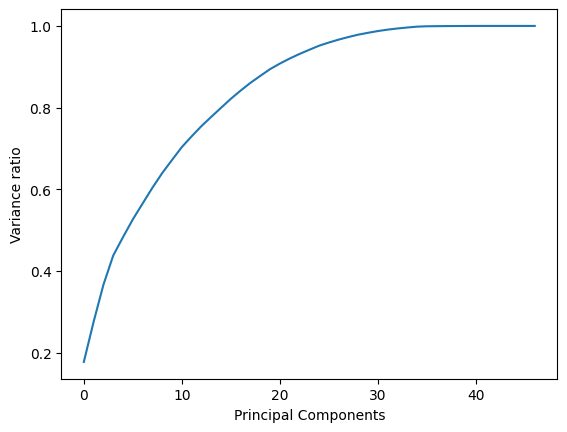

In [292]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance ratio')
plt.show()

In [293]:
n_components = 40
pca = PCA(n_components)
pca_scores_train = pca.fit_transform(X_resampled)

In [294]:
pca_scores_train

array([[-1.49538290e-01,  9.07956418e-01, -1.70433257e-01, ...,
        -1.38776980e-03, -2.57028790e-03, -1.42476718e-03],
       [ 4.92467457e-01,  4.14387105e-01,  6.96231647e-01, ...,
        -7.02361957e-04, -7.58125858e-04,  1.69465932e-03],
       [-8.59997599e-01, -1.83664701e-02, -5.66126305e-01, ...,
         4.88207580e-04,  4.40833115e-04, -5.84622320e-04],
       ...,
       [-3.00825599e-02, -8.05191672e-01,  1.29109083e-01, ...,
        -9.48674190e-05, -4.55603179e-04,  2.86650833e-04],
       [-5.04147520e-02, -3.69281975e-01, -7.76110154e-01, ...,
         6.46715005e-04,  7.67925913e-04,  3.02845927e-04],
       [-7.50081168e-01, -5.89660828e-01,  2.22955151e-01, ...,
         6.30921168e-04,  5.19437594e-04, -2.48767808e-03]])

In [295]:
columns_pca = []
for i in range(n_components):
    columns_pca.append('PCA'+str(i+1))
print(columns_pca)

['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15', 'PCA16', 'PCA17', 'PCA18', 'PCA19', 'PCA20', 'PCA21', 'PCA22', 'PCA23', 'PCA24', 'PCA25', 'PCA26', 'PCA27', 'PCA28', 'PCA29', 'PCA30', 'PCA31', 'PCA32', 'PCA33', 'PCA34', 'PCA35', 'PCA36', 'PCA37', 'PCA38', 'PCA39', 'PCA40']


In [296]:
pca_coor = pd.DataFrame(data = pca_scores_train
             , columns = columns_pca, index = X_resampled.index)
pca_coor

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40
encounter_id,,,,,,,,,,,,,,,,,,,,,
253551,-0.149538,0.907956,-0.170433,0.244671,0.819627,0.263943,-0.138872,0.379994,-0.056461,-0.471384,...,-0.158860,-0.007248,-0.037147,-0.003982,-0.025304,-0.014987,0.010271,-0.001388,-0.002570,-0.001425
914197,0.492467,0.414387,0.696232,0.486383,-0.157328,-0.317571,0.392988,-0.303613,0.069228,0.709557,...,-0.069428,-0.008649,-0.047089,-0.111987,0.009252,0.002941,0.004821,-0.000702,-0.000758,0.001695
719702,-0.859998,-0.018366,-0.566126,0.464707,-0.005663,-0.266172,0.506358,0.261401,-0.631730,0.308848,...,0.077769,-0.063410,0.011138,0.110222,-0.032796,-0.002179,-0.012726,0.000488,0.000441,-0.000585
105710,-0.860974,0.396395,0.742781,0.469298,-0.124838,0.637309,0.187532,-0.130114,-0.281527,-0.071901,...,-0.171482,-0.104394,-0.011634,-0.160809,0.052757,-0.002760,-0.008274,0.003531,0.001614,-0.001821
556161,1.122162,0.210222,0.587652,-0.144279,0.125120,0.104868,0.035733,0.446258,-0.266040,-0.232347,...,0.167878,0.008628,-0.004123,0.000383,0.003608,0.000381,0.013745,-0.001359,-0.001143,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259379,-0.777391,0.385446,0.765030,0.333148,-0.221205,-0.299031,-0.255857,-0.198275,-0.204621,0.470053,...,-0.061322,-0.084368,-0.018439,-0.092171,0.011619,-0.003666,0.003487,0.001648,0.001691,-0.001621
631066,-0.750369,0.820764,-0.152906,0.197102,-0.115626,-0.319235,0.258427,0.000878,-0.539509,0.206706,...,-0.005192,-0.012962,-0.032923,-0.032076,-0.003009,-0.001289,0.006145,-0.000940,-0.000898,0.000252
397846,-0.030083,-0.805192,0.129109,-0.448631,-0.200528,-0.190808,0.147367,-0.440002,0.196607,0.138097,...,0.012229,-0.054553,0.000910,0.006715,0.000668,0.003181,-0.005995,-0.000095,-0.000456,0.000287


In [297]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [1.77201890e-01 9.83472259e-02 9.05518803e-02 7.16360526e-02
 4.51812612e-02 4.33568916e-02 3.89346417e-02 3.86099433e-02
 3.59307909e-02 3.20872030e-02 3.15168936e-02 2.62536594e-02
 2.50938515e-02 2.25900438e-02 2.22592226e-02 2.20296001e-02
 2.01401698e-02 1.89272640e-02 1.69476783e-02 1.65889897e-02
 1.36124431e-02 1.23330028e-02 1.12019828e-02 1.01955464e-02
 1.00306887e-02 7.80298090e-03 7.14453093e-03 6.34560251e-03
 5.78187880e-03 4.57372648e-03 4.23875699e-03 3.48748020e-03
 2.82417082e-03 2.36497529e-03 2.10748988e-03 9.17899028e-04
 2.51003365e-04 2.30735497e-04 1.38650428e-04 1.15507820e-04]


In [298]:
results_dict = {
        "Proportion": pca.explained_variance_ratio_,
        "Cumulative": np.cumsum(pca.explained_variance_ratio_),
    }
results_dict_df = pd.DataFrame(results_dict, index=pca_coor.columns.values )
results_dict_df


,Proportion,Cumulative
PCA1,0.177202,0.177202
PCA2,0.098347,0.275549
PCA3,0.090552,0.366101
PCA4,0.071636,0.437737
PCA5,0.045181,0.482918
PCA6,0.043357,0.526275
PCA7,0.038935,0.565210
PCA8,0.038610,0.603820
PCA9,0.035931,0.639751
PCA10,0.032087,0.671838


In [299]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

In [300]:
loadings

array([[-3.89898181e-04, -2.21076960e-03,  4.47317019e-03, ...,
         3.24137443e-05,  1.01409221e-05,  1.60774947e-05],
       [ 1.04539747e-02, -3.53325637e-03,  9.14734726e-03, ...,
        -4.47776695e-05, -5.21121990e-05, -1.97976680e-05],
       [-2.63979071e-02, -4.13997534e-03, -3.96824314e-03, ...,
         1.74163041e-05,  8.26067730e-06,  1.38796467e-06],
       ...,
       [ 1.98523696e-02, -2.23074112e-01,  4.44584952e-01, ...,
         5.96977859e-06,  8.80686792e-06,  7.90544186e-06],
       [-4.26700164e-01,  4.46604819e-02,  2.91724830e-02, ...,
        -5.87484157e-05, -2.27178368e-05, -4.34626101e-06],
       [-3.23092966e-01,  2.20782087e-02,  1.44009887e-02, ...,
        -1.11043476e-04, -5.04034000e-05,  9.62731817e-06]])

In [301]:
X_resampled.columns.values

array(['race', 'age', 'payer_code', 'admission_type', 'medical_specialty',
       'average_pulse_bpm', 'discharge_disposition', 'admission_source',
       'length_of_stay_in_hospital', 'number_lab_tests',
       'non_lab_procedures', 'number_of_medications', 'primary_diagnosis',
       'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses',
       'log_outpatient_visits_in_previous_year',
       'log_emergency_visits_in_previous_year',
       'log_inpatient_visits_in_previous_year', 'visits_in_previous_year',
       'medication_acarbose', 'medication_acetohexamide',
       'medication_chlorpropamide', 'medication_glimepiride',
       'medication_glimepiride-pioglitazone', 'medication_glipizide',
       'medication_glipizide-metformin', 'medication_glyburide',
       'medication_glyburide-metformin', 'medication_insulin',
       'medication_metformin', 'medication_metformin-pioglitazone',
       'medication_metformin-rosiglitazone', 'medication_miglitol',
       'medication_n

In [302]:
loadings_sat_df = pd.DataFrame(data = loadings
             , columns = columns_pca, index = X_resampled.columns.values)

In [303]:
loadings_sat_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA31,PCA32,PCA33,PCA34,PCA35,PCA36,PCA37,PCA38,PCA39,PCA40
race,-0.000390,-2.210770e-03,4.473170e-03,-7.026293e-03,9.547775e-04,-1.008611e-03,5.444976e-03,3.216673e-03,-9.476795e-03,-4.455614e-03,...,2.354654e-03,-2.002898e-03,-2.073081e-03,1.586353e-03,-9.484061e-04,2.017683e-04,8.386050e-05,3.241374e-05,1.014092e-05,1.607749e-05
age,0.010454,-3.533256e-03,9.147347e-03,1.013952e-02,-1.938913e-02,1.224127e-02,-1.294288e-02,1.707223e-02,3.302994e-02,4.484263e-03,...,2.987171e-03,9.323630e-03,-2.297579e-04,3.766341e-03,-8.811958e-04,1.021005e-05,2.167653e-04,-4.477767e-05,-5.211220e-05,-1.979767e-05
payer_code,-0.026398,-4.139975e-03,-3.968243e-03,5.497416e-04,-1.742645e-02,-1.587486e-02,-6.535057e-03,-3.344774e-02,-4.956519e-02,-1.073359e-02,...,4.322220e-03,-3.275182e-03,3.624381e-04,-1.468897e-04,-1.215546e-03,-4.128729e-05,-6.813373e-05,1.741630e-05,8.260677e-06,1.387965e-06
admission_type,-0.002782,1.922133e-02,4.815260e-03,-4.554348e-03,4.459723e-02,2.070937e-02,4.738298e-02,6.457537e-02,3.021847e-03,9.126327e-04,...,-4.856205e-02,-1.929351e-03,8.956662e-04,4.317538e-03,6.782727e-05,-2.443314e-04,-2.009996e-05,3.378035e-05,-2.198103e-05,1.941812e-05
medical_specialty,0.016226,-1.213747e-02,-4.930053e-03,1.933942e-02,-5.804344e-02,-6.367890e-02,-1.667390e-01,-2.110711e-01,8.006537e-02,6.497860e-02,...,-2.783995e-03,2.285224e-03,6.037035e-04,-5.704621e-04,3.631421e-04,1.194540e-04,5.479854e-05,1.782575e-05,-9.022368e-06,1.280712e-05
average_pulse_bpm,0.002179,2.798783e-03,2.458919e-03,-4.995473e-03,-2.020487e-02,3.321186e-03,-1.292994e-03,-4.082865e-03,1.046408e-03,-7.501009e-02,...,-1.550385e-04,-1.286422e-04,-2.328047e-04,1.103798e-04,-7.943885e-05,-4.277319e-05,1.948662e-05,2.024963e-05,-1.379988e-05,-8.639892e-06
discharge_disposition,0.015068,-1.182158e-02,3.200768e-03,1.038481e-02,1.063171e-02,-5.316458e-03,-1.928906e-02,3.286951e-03,3.612215e-02,1.971563e-02,...,-8.290605e-04,-1.170097e-05,8.107031e-04,-2.617220e-04,3.336433e-04,-1.799942e-05,-5.530142e-05,-6.264150e-05,-1.043441e-05,-3.238126e-05
admission_source,0.001453,1.547973e-02,4.524711e-03,-2.395272e-03,2.809316e-02,1.026835e-02,2.233172e-02,3.088209e-02,1.314609e-02,3.073647e-03,...,8.828113e-02,2.593692e-03,-1.242471e-03,-1.175574e-02,1.739216e-03,4.469307e-04,2.650684e-04,-4.179034e-05,-4.550038e-06,-8.347914e-06
length_of_stay_in_hospital,-0.026628,-1.049877e-02,3.144108e-03,-9.375669e-04,3.623853e-02,7.446242e-03,-3.893427e-02,3.843093e-02,3.360935e-02,1.204538e-01,...,-8.123814e-03,3.573744e-03,-1.313202e-03,-1.045149e-02,1.705698e-03,-2.186988e-05,-2.468580e-05,-1.898891e-05,4.421232e-06,-1.880633e-05
number_lab_tests,-0.013390,1.107669e-03,1.323124e-03,-1.473138e-02,2.656019e-02,4.194212e-03,-2.115508e-02,-2.645735e-03,9.756584e-03,3.508173e-02,...,2.188681e-02,4.227896e-03,-5.747100e-04,-9.882944e-03,2.086953e-03,2.405182e-04,-2.813967e-05,-5.258209e-05,-2.266932e-05,1.873321e-05


# Feature Selection

## Filter Methods

#### Univariate variables

In [304]:
feat_no_var = X_resampled.var().loc[X_resampled.var() == 0].index.values.tolist()
feat_no_var

['medication_acetohexamide',
 'medication_glimepiride-pioglitazone',
 'medication_metformin-pioglitazone',
 'medication_metformin-rosiglitazone',
 'medication_troglitazone']

#### Chi2 for Categorical Variables

In [305]:
from scipy.stats import chi2_contingency

In [306]:
def check_independence(X,y,var):
    df_observed = pd.crosstab(y,X)
    chi2, p, dof, expected = chi2_contingency(df_observed.values)
    if p<0.05:
        return 1
    else:
        return 0

In [307]:
selected_vars = []
# for each feature test importance using chi squared
for var in X_resampled[categorical_features]:
  res = check_independence(X_resampled[var],y_resampled, var)
  if res == 1:
    # if feature is important append to selected features
    selected_vars.append(var)
selected_vars

['age',
 'payer_code',
 'medical_specialty',
 'discharge_disposition',
 'admission_source',
 'primary_diagnosis',
 'secondary_diagnosis',
 'additional_diagnosis',
 'visits_in_previous_year',
 'medication_insulin',
 'medication_metformin',
 'regular_patient',
 'change_in_meds_during_hospitalization_bin',
 'prescribed_diabetes_meds_bin']

#### Mutual information for Numerical Variables

In [308]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=8)
bestfeatures.fit(X_resampled[numerical_features],y_resampled)

cols = bestfeatures.get_support(indices=True)
selected_columns = X_resampled[numerical_features].iloc[:,cols].columns.tolist()

print(selected_columns)

['log_emergency_visits_in_previous_year', 'log_inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'number_diagnoses']


#### Spearman Correlation

In [309]:
data_with_target = X_resampled[numerical_features].join(y_resampled)
cor_spearman = data_with_target.corr(method="spearman")
cor_spearman.head()

,log_outpatient_visits_in_previous_year,log_emergency_visits_in_previous_year,log_inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,readmitted_binary
log_outpatient_visits_in_previous_year,1.000000,0.186244,0.159244,0.006103,-0.015530,-0.021865,-0.035307,0.076507,0.112737,0.044516
log_emergency_visits_in_previous_year,0.186244,1.000000,0.261543,0.010331,-0.016719,-0.002988,-0.045645,0.039889,0.097257,0.094868
log_inpatient_visits_in_previous_year,0.159244,0.261543,1.000000,0.002757,0.077560,0.045630,-0.069325,0.107060,0.129294,0.209427
average_pulse_bpm,0.006103,0.010331,0.002757,1.000000,-0.006866,-0.002629,-0.006625,-0.003818,0.008126,0.004606
length_of_stay_in_hospital,-0.015530,-0.016719,0.077560,-0.006866,1.000000,0.335127,0.221103,0.464137,0.224501,0.076073


In [310]:
high_corr_variables = cor_spearman["readmitted_binary"][abs(cor_spearman["readmitted_binary"]) > 0.75].index.tolist()

# Print or use the high correlation variables
print(high_corr_variables)

['readmitted_binary']


In [311]:
import itertools

high_corr_pairs = []
features_only = X_resampled[numerical_features].columns

# Calculate Spearman correlation
cor_spearman = data_with_target.corr(method='spearman')

# Find variable pairs with correlation greater than 0.75
for pair in itertools.combinations(features_only, 2):
    var1, var2 = pair
    if abs(cor_spearman.loc[var1, var2]) > 0.75:
        high_corr_pairs.append((var1, var2))

# Display the variable pairs
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} have correlation greater than 0.75")


## Lasso

In [312]:
sns.set(style="whitegrid")
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.savefig(name+'_plot_importance.png', dpi=200)
    plt.show()

In [313]:
from sklearn.linear_model import LassoCV

# Baseline dataset (X_train + Y_train)
reg = LassoCV(random_state=42)
reg.fit(X_resampled, y_resampled)
coef = pd.Series(reg.coef_, index = X_resampled.columns)
print(coef.sort_values())

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
# The variables with the value 0 are supposedly dropped.
lasso_selected_features = coef[coef!=0].index.tolist()

payer_code                                  -0.070627
log_outpatient_visits_in_previous_year      -0.061863
medication_nateglinide                      -0.043180
medication_metformin                        -0.033249
primary_diagnosis                           -0.028823
medication_rosiglitazone                    -0.017291
test_result                                 -0.016333
medication_chlorpropamide                   -0.015050
medication_acarbose                         -0.014117
medication_glimepiride                      -0.014018
secondary_diagnosis                         -0.011813
medication_glyburide                        -0.007353
gender_bin                                  -0.005011
medication_insulin                          -0.004553
medication_glipizide                        -0.002951
medication_pioglitazone                     -0.002448
additional_diagnosis                        -0.000312
medication_glimepiride-pioglitazone          0.000000
medication_acetohexamide    

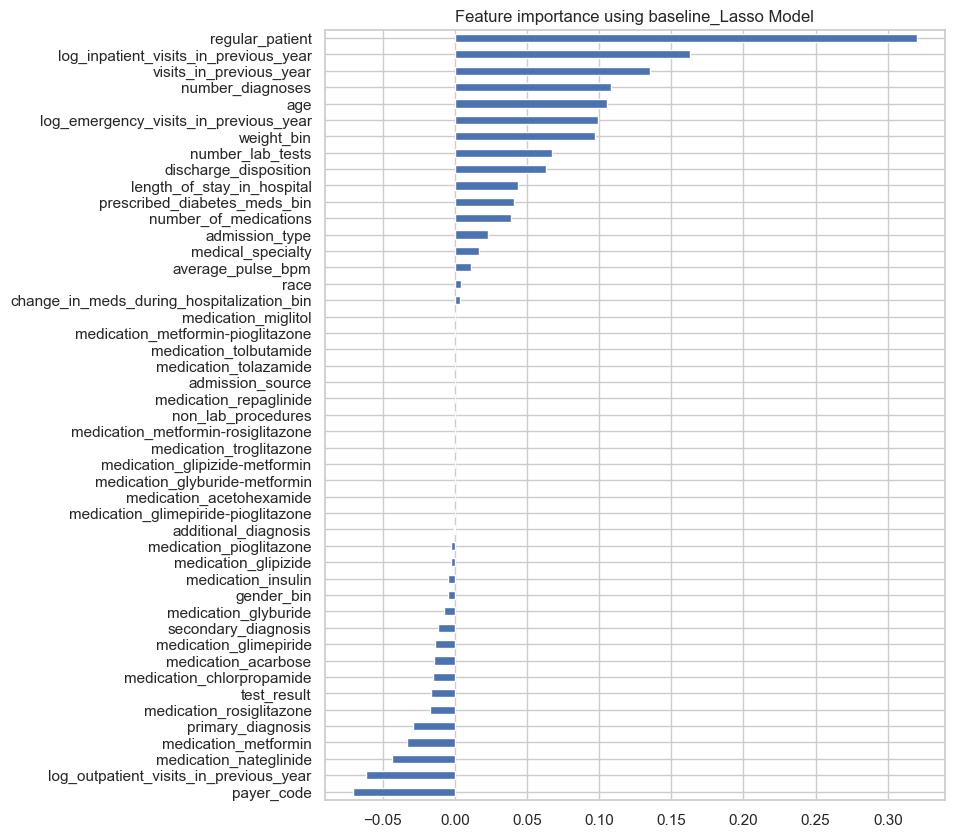

In [314]:
plot_importance(coef,'baseline_Lasso')

## RFE

In [315]:
nof_list=np.arange(1,48) # desde 1 até 48 deu 8 features com .score de 0.681530
high_score=0
# Variable to store the optimum features
nof=0
score_list =[]
for i in range(len(nof_list)):
    model = RandomForestClassifier(random_state=42)
    rfe = RFE(model, n_features_to_select=nof_list[i]) # 8 nof_list[i]
    X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
    X_val_rfe= rfe.transform(X_val)
    model.fit(X_train_rfe,y_resampled)

    score = model.score(X_val_rfe,y_val)
    score_list.append(score)

    if(score>high_score):
        high_score = score
        nof = nof_list[i]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=nof) # not
X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
model.fit(X_train_rfe,y_resampled)

rfe_selected_features = pd.Series(rfe.support_, index=X_resampled.columns)
print(rfe_selected_features)

Optimum number of features: 8
Score with 8 features: 0.681530
race                                         False
age                                          False
payer_code                                   False
admission_type                               False
medical_specialty                            False
average_pulse_bpm                             True
discharge_disposition                        False
admission_source                             False
length_of_stay_in_hospital                    True
number_lab_tests                              True
non_lab_procedures                           False
number_of_medications                         True
primary_diagnosis                             True
secondary_diagnosis                           True
additional_diagnosis                          True
number_diagnoses                             False
log_outpatient_visits_in_previous_year       False
log_emergency_visits_in_previous_year        False
log_inpatient_visits

In [316]:
rfe_selected_features = rfe_selected_features[rfe_selected_features==True].index.tolist()

## Decision Tree

<AxesSubplot: xlabel='Value', ylabel='Col'>

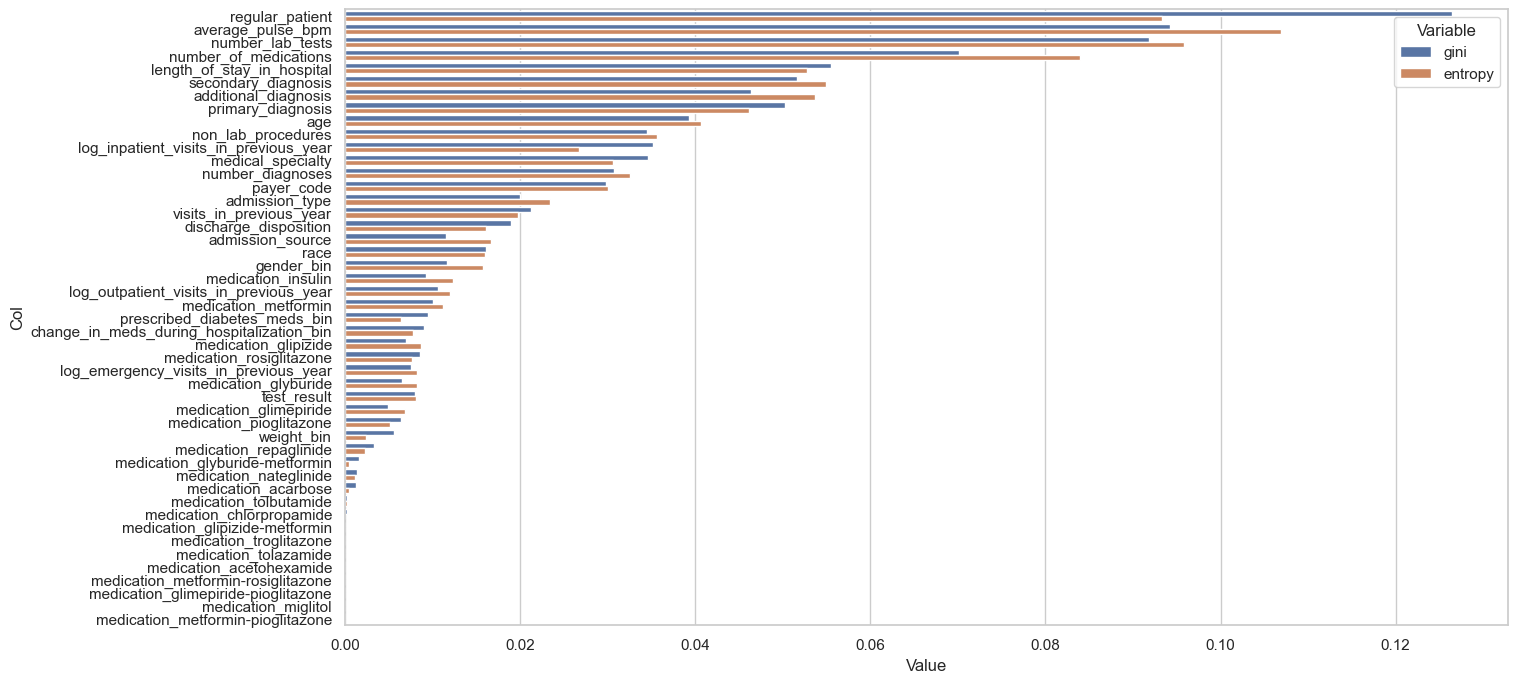

In [317]:
from sklearn.tree import DecisionTreeClassifier

sns.set(style="whitegrid")

gini_importance = DecisionTreeClassifier().fit(X_resampled, y_resampled).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_resampled, y_resampled).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_resampled.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [318]:
# Decidimos criar um threshold de 47 featues sobre 100 ( recomendação do prof )

selected_features_gini = []
selected_features_entropy = []
print("For GINI INDEX")
association_dict = dict(zip(gini_importance, X_train.columns))
for column, value in association_dict.items():
    if column > (100/47)/100:
        print(f"{column}: {value}")
        selected_features_gini.append(value)

print("-----------------------\n")
print("For ENTROPY IMPORTANCE")
association_dict_e = dict(zip(entropy_importance, X_train.columns))
for column, value in association_dict_e.items():
    if column > (100/47)/100:
        print(f"{column}: {value}")
        selected_features_entropy.append(value)

print("-----------------------\n")
print(set(selected_features_gini).intersection(set(selected_features_entropy)))
print(len(set(selected_features_gini).intersection(set(selected_features_entropy))))


For GINI INDEX
0.03932317529411246: age
0.029735135697395748: payer_code
0.03454815806760787: medical_specialty
0.09420011055551238: average_pulse_bpm
0.055525938536961736: length_of_stay_in_hospital
0.09180254034013764: number_lab_tests
0.03452455011035091: non_lab_procedures
0.07012432245593447: number_of_medications
0.050209904092523475: primary_diagnosis
0.05161075671954352: secondary_diagnosis
0.04637758750152817: additional_diagnosis
0.03068475310905414: number_diagnoses
0.0351508253897525: log_inpatient_visits_in_previous_year
0.12648573204928107: regular_patient
-----------------------

For ENTROPY IMPORTANCE
0.0405880119948529: age
0.029997217560940474: payer_code
0.02335234865259945: admission_type
0.030597767366514917: medical_specialty
0.10687227053566337: average_pulse_bpm
0.05271002679551737: length_of_stay_in_hospital
0.09586081515680196: number_lab_tests
0.035657129863481164: non_lab_procedures
0.08390873376906037: number_of_medications
0.04615068645973925: primary_diag

In [319]:
dt_selected_features = set(selected_features_gini).intersection(set(selected_features_entropy))
dt_selected_features

{'additional_diagnosis',
 'age',
 'average_pulse_bpm',
 'length_of_stay_in_hospital',
 'log_inpatient_visits_in_previous_year',
 'medical_specialty',
 'non_lab_procedures',
 'number_diagnoses',
 'number_lab_tests',
 'number_of_medications',
 'payer_code',
 'primary_diagnosis',
 'regular_patient',
 'secondary_diagnosis'}

In [320]:
### Best Feature Selection ( intersection between all methods )

In [321]:
final_features = []

for i in lasso_selected_features:
    #print(i)
    final_features.append(i)
for i in rfe_selected_features:
    #print(i)
    final_features.append(i)
for i in dt_selected_features:
    #print(i)
    final_features.append(i)


In [322]:
from collections import Counter

feature_counts = Counter(final_features)

final_selected_features = [feature for feature, count in feature_counts.items() if count >= 2]

print(final_selected_features)
len(final_selected_features)

['age', 'payer_code', 'medical_specialty', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses', 'log_inpatient_visits_in_previous_year', 'regular_patient']


13

In [323]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

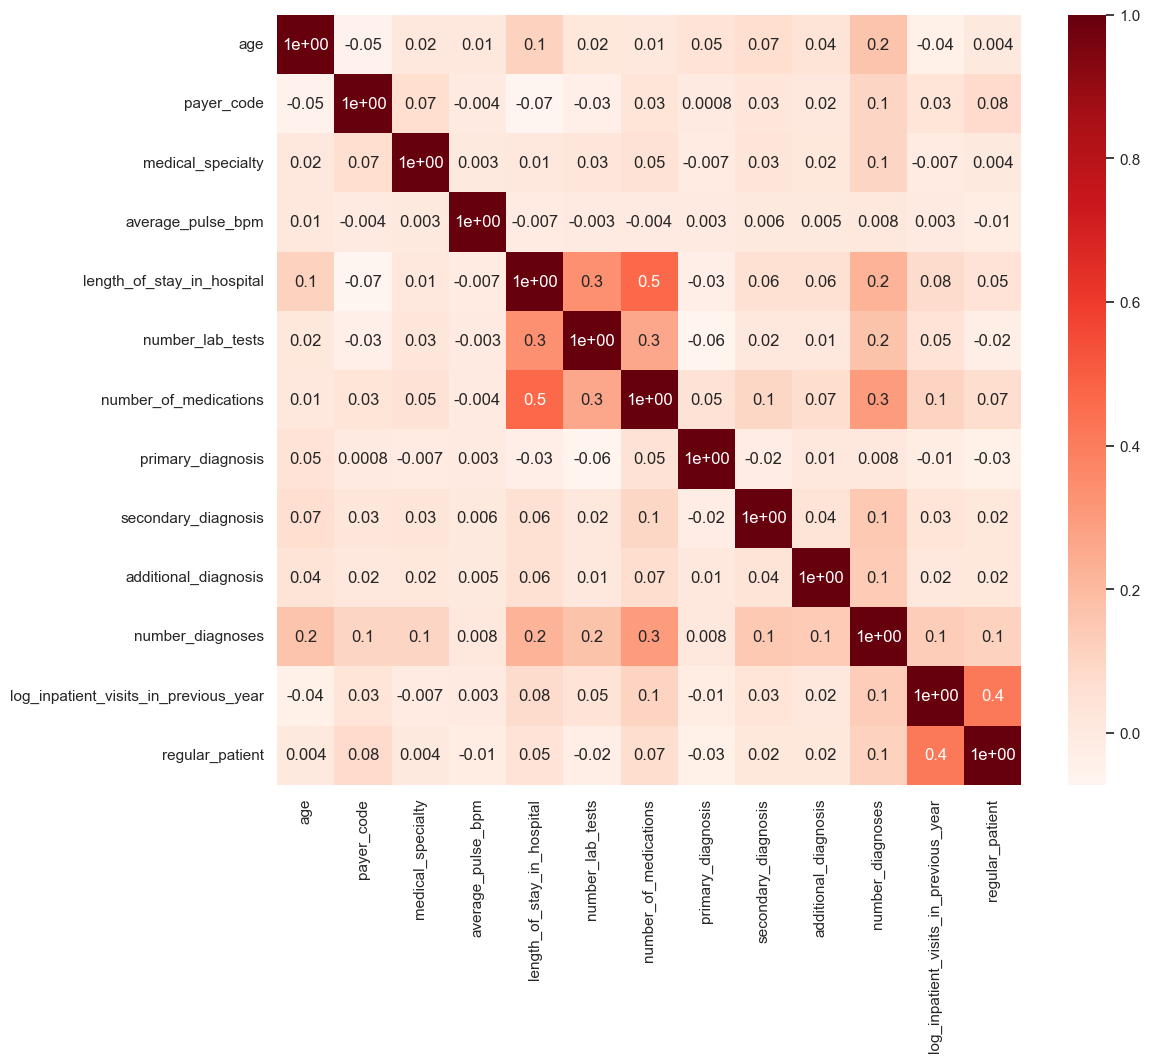

In [324]:
cor_heatmap(X_resampled[final_selected_features].corr(method="spearman"))

In [325]:
# Depois da análise decidimos dropar "inpatient_visits_in_previous_year_bin", já que tem uma correlação mais alta com as outras variáveis
# dq a outra variável em causa "visits_in_previous_year"

# final_selected_features.remove("inpatient_visits_in_previous_year_bin")

In [326]:
final_selected_features

['age',
 'payer_code',
 'medical_specialty',
 'average_pulse_bpm',
 'length_of_stay_in_hospital',
 'number_lab_tests',
 'number_of_medications',
 'primary_diagnosis',
 'secondary_diagnosis',
 'additional_diagnosis',
 'number_diagnoses',
 'log_inpatient_visits_in_previous_year',
 'regular_patient']

## 8. Modeling Selection and Evaluation

In [327]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)

models = ['LogisticReg', 'KNN', 'DecisionTree', 'SVM', 'NaiveBayes', 'BaggingClassifier', 'RandomForest', 'AdaBoost', 'GradBoost',  'MLP']

models_train_score = {}
models_val_score = {}

features_dict = {}

for feat in X_resampled.columns:
    features_dict[feat] = []

for model in models:
    models_train_score[model] = []
    models_val_score[model] = []


for train_index, val_index in rkf.split(X_resampled, y_resampled):

    X_train, X_val = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
    y_train, y_val = y_resampled.iloc[train_index], y_resampled.iloc[val_index]




# Logistic Regression
    logistic_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
    y_prob_train = logistic_clf.predict_proba(X_train)[:, 1]  # Probabilities for class 1
    threshold = 0.4  # Adjust this threshold based on your needs
    y_pred_train = (y_prob_train > threshold).astype(int)
    train_f1 = f1_score(y_train, y_pred_train)
    models_train_score['LogisticReg'].append(train_f1)
  
    # Evaluate on the validation set
    y_prob_val = logistic_clf.predict_proba(X_val)[:, 1]  # Probabilities for class 1
    y_pred_val = (y_prob_val > threshold).astype(int)
    val_f1 = f1_score(y_val, y_pred_val)
    models_val_score['LogisticReg'].append(val_f1)

    # KNN
    KNN_clf = KNeighborsClassifier().fit(X_train, y_train)
    y_pred = KNN_clf.predict(X_train)
    models_train_score['KNN'].append(f1_score(y_train, y_pred))
  
    y_pred = KNN_clf.predict(X_val)
    models_val_score['KNN'].append(f1_score(y_val, y_pred))
  
    # Decision Tree
    tree_clf = DecisionTreeClassifier(random_state = 42).fit(X_train, y_train)
    y_pred = tree_clf.predict(X_train)
    models_train_score['DecisionTree'].append(f1_score(y_train, y_pred))
  
    y_pred = tree_clf.predict(X_val)
    models_val_score['DecisionTree'].append(f1_score(y_val, y_pred))
  
    # SVM
    svm_clf = SVC(random_state = 42).fit(X_train, y_train)
    y_pred = svm_clf.predict(X_train)
    models_train_score['SVM'].append(f1_score(y_train, y_pred))
  
    y_pred = svm_clf.predict(X_val)
    models_val_score['SVM'].append(f1_score(y_val, y_pred))
  
    # GaussianNB
    nb_clf = GaussianNB().fit(X_train, y_train)
    y_pred = nb_clf.predict(X_train)
    models_train_score['NaiveBayes'].append(f1_score(y_train, y_pred))
  
    y_pred = nb_clf.predict(X_val)
    models_val_score['NaiveBayes'].append(f1_score(y_val, y_pred))
  
    # BaggingClassifier
    bagging_clf = BaggingClassifier(random_state = 42).fit(X_train, y_train)
    y_pred = bagging_clf.predict(X_train)
    models_train_score['BaggingClassifier'].append(f1_score(y_train, y_pred))
  
    y_pred = bagging_clf.predict(X_val)
    models_val_score['BaggingClassifier'].append(f1_score(y_val, y_pred))
  
    # Random Forest
    forest_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    y_pred = forest_clf.predict(X_train)
    models_train_score['RandomForest'].append(f1_score(y_train, y_pred))
  
    y_pred = forest_clf.predict(X_val)
    models_val_score['RandomForest'].append(f1_score(y_val, y_pred))
  
    # Adaptive Boosting with Decision Tree
    adaboost_clf = AdaBoostClassifier(random_state = 42).fit(X_train, y_train)
    y_pred = adaboost_clf.predict(X_train)
    models_train_score['AdaBoost'].append(f1_score(y_train, y_pred))
  
    y_pred = adaboost_clf.predict(X_val)
    models_val_score['AdaBoost'].append(f1_score(y_val, y_pred))

    # Gradient Boosting
    grad_clf = GradientBoostingClassifier(random_state = 42).fit(X_train, y_train)
    y_pred = grad_clf.predict(X_train)
    models_train_score['GradBoost'].append(f1_score(y_train, y_pred))
  
    y_pred = grad_clf.predict(X_val)
    models_val_score['GradBoost'].append(f1_score(y_val, y_pred))
  
    # MLP
    mlp_clf = MLPClassifier(hidden_layer_sizes = (100, 100, 100), random_state = 42).fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_train)
    models_train_score['MLP'].append(f1_score(y_train, y_pred))
  
    y_pred = mlp_clf.predict(X_val)
    models_val_score['MLP'].append(f1_score(y_val, y_pred))

    

In [328]:
for train_index, val_index in rkf.split(X_resampled, y_resampled):

    X_train, X_val = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
    y_train, y_val = y_resampled.iloc[train_index], y_resampled.iloc[val_index]

    #prob_model_SVM = svm_clf.predict_proba(X_val)
    prob_model_KNN = KNN_clf.predict_proba(X_val)
    prob_model_DT = tree_clf.predict_proba(X_val)
    prob_model_NB = nb_clf.predict_proba(X_val) 
    prob_model_BC = bagging_clf.predict_proba(X_val)
    prob_model_RF = forest_clf.predict_proba(X_val)
    prob_model_AB = adaboost_clf.predict_proba(X_val)
    prob_model_GB = grad_clf.predict_proba(X_val)
    prob_model_MLP = mlp_clf.predict_proba(X_val)
      
    fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_val, y_pred_val)
    fpr_DT, tpr_DT, thresholds_DT = roc_curve(y_val, prob_model_DT[:,1])
    fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_val, prob_model_NB[:,1])
    #fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_val, prob_model_SVM[:,1])
    fpr_BC, tpr_BC, thresholds_BC = roc_curve(y_val, prob_model_BC[:,1])
    fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_val, prob_model_RF[:,1])
    fpr_AB, tpr_AB, thresholds_AB = roc_curve(y_val, prob_model_AB[:,1])
    fpr_GB, tpr_GB, thresholds_GB = roc_curve(y_val, prob_model_GB[:,1])
    fpr_MLP, tpr_MLP, thresholds_MLP = roc_curve(y_val, prob_model_MLP[:,1])

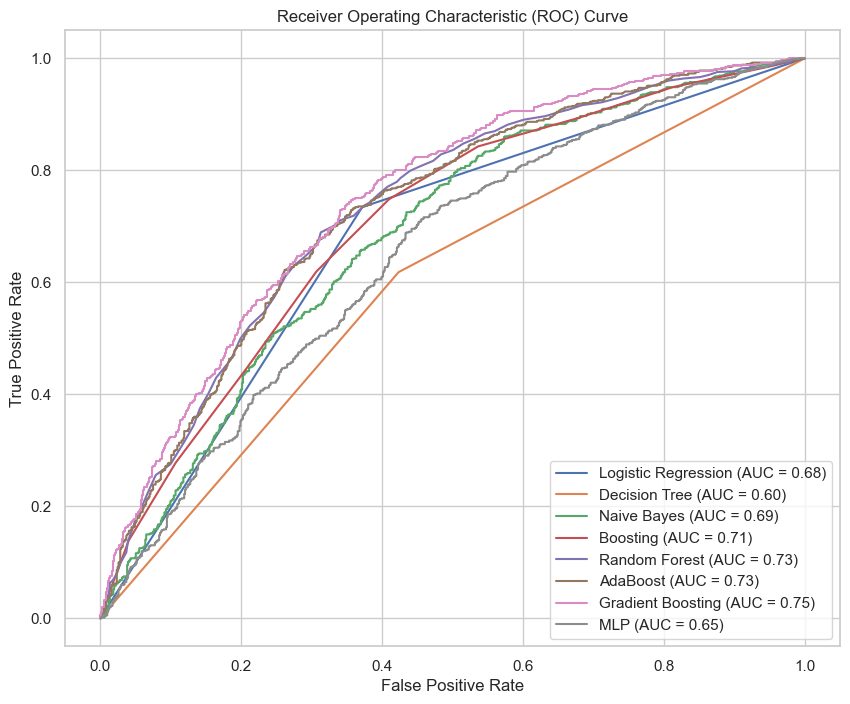

In [329]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10, 8))

plt.plot(fpr_LR, tpr_LR, label='Logistic Regression (AUC = {:.2f})'.format(auc(fpr_LR, tpr_LR)))
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (AUC = {:.2f})'.format(auc(fpr_DT, tpr_DT)))
plt.plot(fpr_NB, tpr_NB, label='Naive Bayes (AUC = {:.2f})'.format(auc(fpr_NB, tpr_NB)))
#plt.plot(fpr_SVM, tpr_SVM, label='SVM (AUC = {:.2f})'.format(auc(fpr_SVM, tpr_SVM)))
plt.plot(fpr_BC, tpr_BC, label='Boosting (AUC = {:.2f})'.format(auc(fpr_BC, tpr_BC)))
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUC = {:.2f})'.format(auc(fpr_RF, tpr_RF)))
plt.plot(fpr_AB, tpr_AB, label='AdaBoost (AUC = {:.2f})'.format(auc(fpr_AB, tpr_AB)))
plt.plot(fpr_GB, tpr_GB, label='Gradient Boosting (AUC = {:.2f})'.format(auc(fpr_GB, tpr_GB)))
plt.plot(fpr_MLP, tpr_MLP, label='MLP (AUC = {:.2f})'.format(auc(fpr_MLP, tpr_MLP)))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [330]:
def show_models_results(train_scores, val_scores):
  df = pd.DataFrame(columns = ['Train', 'Val'], index = train_scores.keys())

  for model, scores in train_scores.items():
    df.loc[model, 'Train'] = str(round(np.mean(train_scores[model]),3)) + '+/-' + str(round(np.std(train_scores[model]),2))
    df.loc[model, 'Val'] = str(round(np.mean(val_scores[model]),3)) + '+/-' + str(round(np.std(val_scores[model]),2))

  return df

In [331]:
df = show_models_results(models_train_score, models_val_score)
df

,Train,Val
LogisticReg,0.703+/-0.0,0.701+/-0.01
KNN,0.745+/-0.0,0.621+/-0.01
DecisionTree,1.0+/-0.0,0.592+/-0.01
SVM,0.701+/-0.0,0.697+/-0.01
NaiveBayes,0.225+/-0.19,0.221+/-0.19
BaggingClassifier,0.983+/-0.0,0.624+/-0.01
RandomForest,1.0+/-0.0,0.699+/-0.01
AdaBoost,0.688+/-0.0,0.683+/-0.01
GradBoost,0.719+/-0.0,0.709+/-0.01
MLP,0.979+/-0.01,0.601+/-0.02


In [332]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
rf_clf = RandomForestClassifier(random_state=42,criterion="gini", n_estimators=100, max_depth=2, min_samples_split=2, min_samples_leaf=4)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

ensemble_clf = VotingClassifier(
        estimators=[
            ('random_forest', rf_clf),
            ('gradient_boosting', gb_clf)
        ],
        voting='soft'  # 'soft' for using predicted class probabilities, 'hard' for majority voting
    )

ensemble_clf.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_val_pred = ensemble_clf.predict(X_val)

# Evaluate the model performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Display the scores and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.6899

Confusion Matrix:
[[521 294]
 [199 576]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.64      0.68       815
           1       0.66      0.74      0.70       775

    accuracy                           0.69      1590
   macro avg       0.69      0.69      0.69      1590
weighted avg       0.69      0.69      0.69      1590



## Decision Tree

In [333]:
from sklearn.tree import DecisionTreeClassifier

In [334]:
dt_alpha = DecisionTreeClassifier(random_state=42)
path = dt_alpha.cost_complexity_pruning_path(X_resampled, y_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [335]:
trees = []
for ccp_alpha in ccp_alphas:
    dt_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_resampled, y_resampled)
    trees.append(dt_alpha)

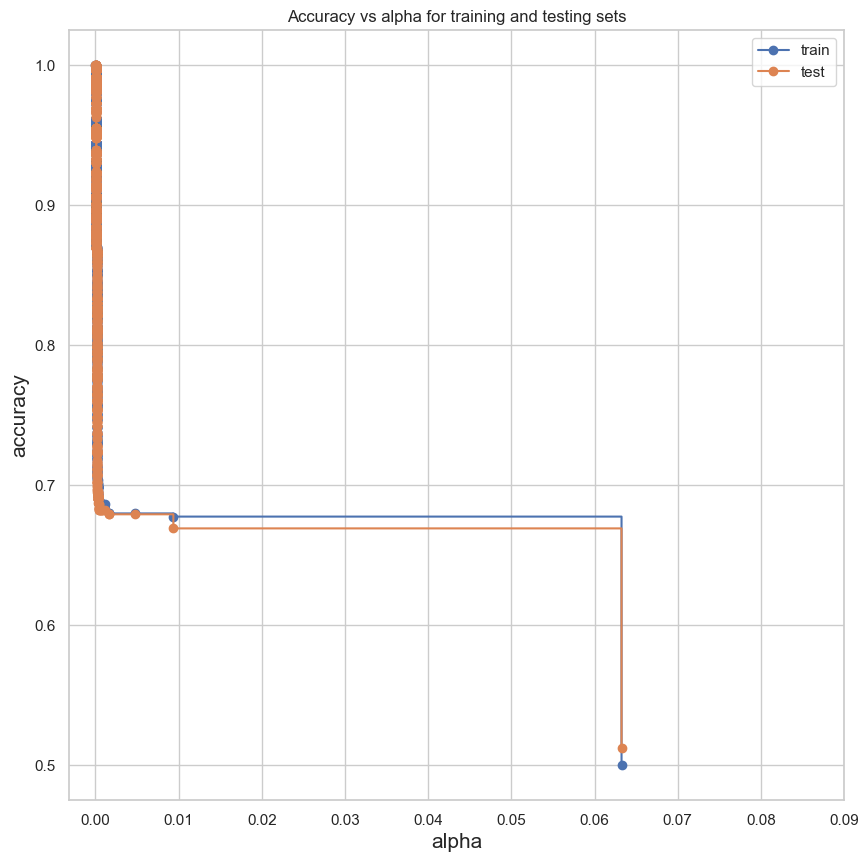

In [336]:
from sklearn.metrics import f1_score
train_scores = [tree.score(X_resampled, y_resampled) for tree in trees]
test_scores = [tree.score(X_val, y_val) for tree in trees]

fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlabel("alpha", fontsize=15)
ax.set_ylabel("accuracy", fontsize=15)
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
plt.xticks(np.arange(0,0.1,0.01))
ax.legend()
plt.show()

In [337]:
index_best_model = np.argmax(test_scores)
best_model = trees[index_best_model]
print('ccp_alpha of best model: ',trees[index_best_model])
print('_____________________________________________________________')
print('Training accuracy of best model: ',best_model.score(X_resampled, y_resampled))
print('Test accuracy of best model: ',best_model.score(X_val, y_val))

ccp_alpha of best model:  DecisionTreeClassifier(random_state=42)
_____________________________________________________________
Training accuracy of best model:  1.0
Test accuracy of best model:  1.0


In [338]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# create a splitter object
rkfold = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)
# define your model (any model)
dt_model = DecisionTreeClassifier(ccp_alpha= 0.063,criterion="gini", max_depth=2, min_samples_split=2, min_samples_leaf=4)
# pass your model and KFold object to cross_val_score
# to fit and get the mse of each fold of data

for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(dt_model,
                            X_resampled, y_resampled,
                            cv=rkfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")



accuracy: 0.5983647798742139
recall: 0.6662311819114747
precision: 0.5217050825464551
f1: 0.5716285130229161


## Logistic Regression

In [339]:
from sklearn.linear_model import LogisticRegression

# Create the model
log_reg2 = LogisticRegression()

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)

log_reg2 = LogisticRegression()
for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(log_reg2,
                            X_resampled, y_resampled,
                            cv=rkfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")


accuracy: 0.6760377358490566
recall: 0.7006867270165473
precision: 0.667686726464189
f1: 0.6836875150478294


## AdaBoostClassifier

In [340]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)


for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(clf,
                            X_resampled, y_resampled,
                            cv=rkfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")

accuracy: 0.6764779874213837
recall: 0.696346708421984
precision: 0.6697061049805557
f1: 0.6826574054018859


## GradientBoostingClassifier

In [341]:
y_resampled

encounter_id
253551    0
914197    0
719702    0
105710    0
556161    0
         ..
259379    1
631066    1
397846    1
944729    1
332030    1
Name: readmitted_binary, Length: 15900, dtype: int32

In [342]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=600, learning_rate=1.0, max_depth=1, random_state=0)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)

for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(gbc,
                            X_resampled, y_resampled,
                            cv=rkfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")

accuracy: 0.6767295597484275
recall: 0.6952164806719894
precision: 0.6703752732338683
f1: 0.6824604103273694


In [343]:
clf.fit(X_resampled, y_resampled)

y_pred_test = clf.predict(test)
sub = pd.Series(y_pred_test, index = test.index)
sub = sub.map({0: 'No', 1: 'Yes'})

sub.columns = ["readmitted_binary"]
sub.to_csv("final_outada.csv")

sub

encounter_id
499502     No
447319     No
309126     No
181183     No
359339     No
         ... 
451150     No
549298    Yes
327586     No
351214     No
914270     No
Length: 30530, dtype: object

In [344]:
sub.value_counts()

No     27220
Yes     3310
Name: count, dtype: int64

In [345]:
gbc.fit(X_resampled, y_resampled)

y_pred_test = gbc.predict(test)
sub = pd.Series(y_pred_test, index = test.index)
sub = sub.map({0: 'No', 1: 'Yes'})

sub.columns = ["readmitted_binary"]
sub.to_csv("final_outada2.csv")

sub

encounter_id
499502    No
447319    No
309126    No
181183    No
359339    No
          ..
451150    No
549298    No
327586    No
351214    No
914270    No
Length: 30530, dtype: object

In [346]:
sub.value_counts()

No     30529
Yes        1
Name: count, dtype: int64

### RandomForest

In [347]:
# ainda podemos fazer o melhor gráfico para encontrar o melhor alfa

In [348]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import StratifiedKFold

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42,criterion="gini",ccp_alpha=0.015, n_estimators=100, max_depth=2, min_samples_split=2, min_samples_leaf=4)

# Train the model on the training split
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Display the scores and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
# Kaggle: 0.31 sem RFE I didnt used grid and with split data at 0.1 test

Accuracy: 0.6692

Confusion Matrix:
[[538 277]
 [249 526]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.66      0.67       815
           1       0.66      0.68      0.67       775

    accuracy                           0.67      1590
   macro avg       0.67      0.67      0.67      1590
weighted avg       0.67      0.67      0.67      1590



In [349]:
y_pred_test = ensemble_clf.predict(test)
sub = pd.DataFrame(y_pred_test, index = test.index)

sub.columns = ["readmitted_binary"]
# Assuming 'readmitted_binary' is your target variable
target_mapping = {0: 'No', 1: 'Yes'}
sub['readmitted_binary'] = sub['readmitted_binary'].map(target_mapping)
sub.to_csv("final_out3.csv")

sub

,readmitted_binary
encounter_id,
499502,No
447319,Yes
309126,No
181183,No
359339,No
...,...
451150,No
549298,Yes
327586,Yes


In [350]:
sub.value_counts()

readmitted_binary
No                   21986
Yes                   8544
Name: count, dtype: int64

In [351]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 3390.4908804893494 seconds


# ---------------------------------------------------------------------------------------------------------

## Multiclassifier

In [352]:
start_time = time.time()
Mx_train = train.drop(["readmitted_binary", "readmitted_multiclass"], axis = 1)

In [353]:
scale_train = MinMaxScaler().fit(Mx_train)

train_scaled = scale_train.transform(Mx_train)
train_scaled = pd.DataFrame(train_scaled, columns = Mx_train.columns, index=Mx_train.index)

## 1. Scaling Data

In [354]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'X_train' contains the features and 'y_train' contains the target variable in the training set
X_train = train_scaled # Adjust columns accordingly
y_train = train['readmitted_multiclass']

target_mapping = {'No': 0, '<30 days': 1, '>30 days': 2}
y_train = y_train.map(target_mapping)

# Split the data into training and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify= y_train, shuffle=True)


In [355]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 2)))
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {}\n".format(sum(y_train == 0)))

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and transform the data
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# After Undersampling
print('After Undersampling, the shape of X_train: {}'.format(X_resampled.shape))
print('After Undersampling, the shape of Y_train: {}\n'.format(y_resampled.shape))

print("After Undersampling, counts of label '2': {}".format(sum(y_resampled == 2)))
print("After Undersampling, counts of label '1': {}".format(sum(y_resampled == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_resampled == 0)))

Before Undersampling, counts of label '1': 24879
Before Undersampling, counts of label '1': 7950
Before Undersampling, counts of label '0': 37255

After Undersampling, the shape of X_train: (23850, 47)
After Undersampling, the shape of Y_train: (23850,)

After Undersampling, counts of label '2': 7950
After Undersampling, counts of label '1': 7950
After Undersampling, counts of label '0': 7950


In [356]:
y_resampled.value_counts(normalize = True)

readmitted_multiclass
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

# 2. Filter Selection

### Filter Methods

#### Chi2 for Categorical Variables

In [357]:
selected_vars = []
# for each feature test importance using chi squared
for var in X_resampled[categorical_features]:
  res = check_independence(X_resampled[var],y_resampled, var)
  if res == 1:
    # if feature is important append to selected features
    selected_vars.append(var)
selected_vars

['race',
 'age',
 'payer_code',
 'admission_type',
 'medical_specialty',
 'discharge_disposition',
 'admission_source',
 'primary_diagnosis',
 'secondary_diagnosis',
 'additional_diagnosis',
 'visits_in_previous_year',
 'medication_acarbose',
 'medication_glimepiride',
 'medication_insulin',
 'medication_metformin',
 'medication_repaglinide',
 'medication_rosiglitazone',
 'weight_bin',
 'test_result',
 'regular_patient',
 'gender_bin',
 'change_in_meds_during_hospitalization_bin',
 'prescribed_diabetes_meds_bin']

#### Mutual information for Numerical Variables

In [358]:
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=8)
bestfeatures.fit(X_resampled[numerical_features],y_resampled)

cols = bestfeatures.get_support(indices=True)
selected_columns = X_resampled[numerical_features].iloc[:,cols].columns.tolist()

print(selected_columns)

['log_outpatient_visits_in_previous_year', 'log_emergency_visits_in_previous_year', 'log_inpatient_visits_in_previous_year', 'average_pulse_bpm', 'length_of_stay_in_hospital', 'number_lab_tests', 'number_of_medications', 'number_diagnoses']


#### Spearman Correlation

In [359]:
data_with_target = X_resampled[numerical_features].join(y_resampled)
cor_spearman = data_with_target.corr(method="spearman")
cor_spearman.head()

,log_outpatient_visits_in_previous_year,log_emergency_visits_in_previous_year,log_inpatient_visits_in_previous_year,average_pulse_bpm,length_of_stay_in_hospital,number_lab_tests,non_lab_procedures,number_of_medications,number_diagnoses,readmitted_multiclass
log_outpatient_visits_in_previous_year,1.000000,0.190251,0.162847,0.005302,-0.013198,-0.022118,-0.028546,0.069584,0.108340,0.092810
log_emergency_visits_in_previous_year,0.190251,1.000000,0.243618,0.003916,-0.018698,-0.002028,-0.037138,0.034268,0.093619,0.091491
log_inpatient_visits_in_previous_year,0.162847,0.243618,1.000000,0.002159,0.084430,0.035116,-0.064314,0.098907,0.125563,0.163647
average_pulse_bpm,0.005302,0.003916,0.002159,1.000000,0.004942,-0.012724,-0.000571,0.002424,-0.006810,-0.006027
length_of_stay_in_hospital,-0.013198,-0.018698,0.084430,0.004942,1.000000,0.330064,0.209315,0.468963,0.230135,0.035398


In [360]:
high_corr_pairs = []
features_only = X_resampled[numerical_features].columns

# Calculate Spearman correlation
cor_spearman = X_resampled.corr(method='spearman')

# Find variable pairs with correlation greater than 0.75
for pair in itertools.combinations(features_only, 2):
    var1, var2 = pair
    correlation = cor_spearman.loc[var1, var2]
    if abs(correlation) > 0.75:
        high_corr_pairs.append((var1, var2, correlation))

# Display the variable pairs
if high_corr_pairs:
    for pair in high_corr_pairs:
        print(f"{pair[0]} and {pair[1]} have correlation {pair[2]:.2f}")
else:
    print("No variable pairs with correlation greater than 0.75 found.")


No variable pairs with correlation greater than 0.75 found.


## Lasso

In [361]:
# Baseline dataset (X_train + Y_train)
reg = LassoCV(random_state=42)
reg.fit(X_resampled, y_resampled)
coef = pd.Series(reg.coef_, index = X_resampled.columns)
print(coef.sort_values())

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
# The variables with the value 0 are supposedly dropped.
lasso_selected_features = coef[coef!=0].index.tolist()

discharge_disposition                       -0.248851
admission_source                            -0.201131
payer_code                                  -0.161729
visits_in_previous_year                     -0.158220
number_of_medications                       -0.070927
non_lab_procedures                          -0.062296
medication_metformin                        -0.037903
primary_diagnosis                           -0.031118
secondary_diagnosis                         -0.022028
medication_insulin                          -0.015289
average_pulse_bpm                           -0.013837
race                                        -0.012436
change_in_meds_during_hospitalization_bin   -0.005259
medication_glyburide                        -0.000117
medication_glimepiride-pioglitazone          0.000000
medication_glipizide-metformin               0.000000
medication_metformin-rosiglitazone           0.000000
medication_acetohexamide                     0.000000
medication_miglitol         

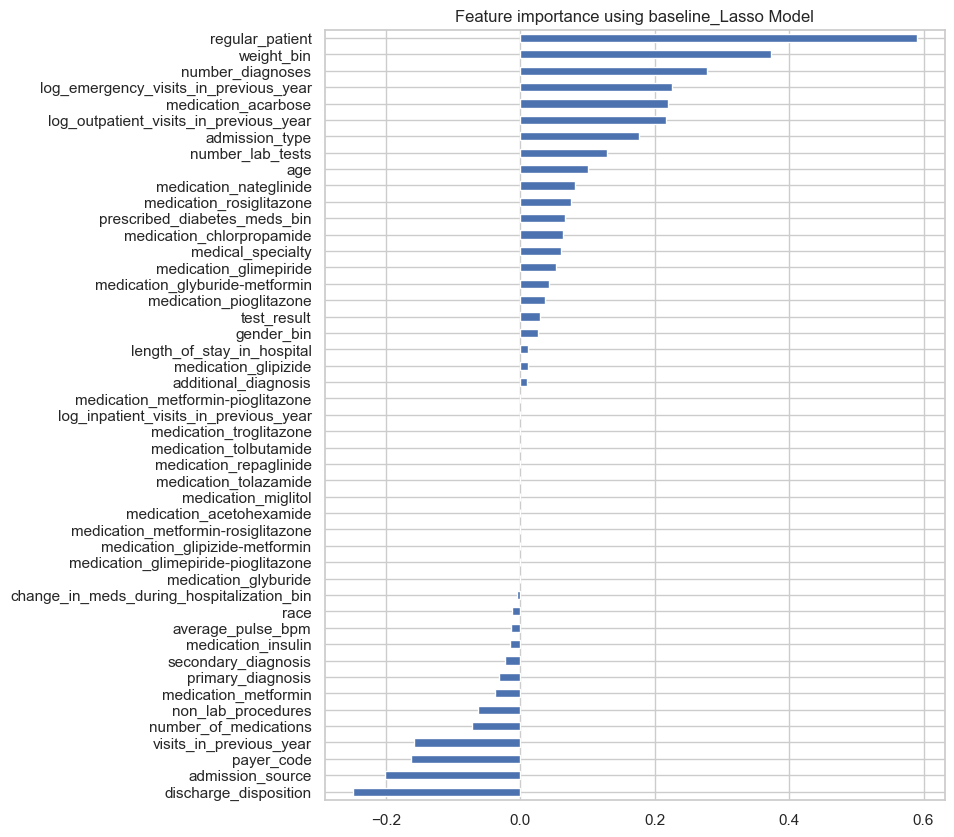

In [362]:
plot_importance(coef,'baseline_Lasso')

## RFE

In [363]:
nof_list=np.arange(1,48) # desde 1 até 48 deu 8 features com .score de 0.681530
high_score=0
# Variable to store the optimum features
nof=0
score_list =[]
for i in range(len(nof_list)):
    model = RandomForestClassifier(random_state=42)
    rfe = RFE(model, n_features_to_select=nof_list[i]) # 8 nof_list[i]
    X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
    X_val_rfe= rfe.transform(X_val)
    model.fit(X_train_rfe,y_resampled)

    score = model.score(X_val_rfe,y_val)
    score_list.append(score)

    if(score>high_score):
        high_score = score
        nof = nof_list[i]

print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

rfe = RFE(RandomForestClassifier(random_state=42), n_features_to_select=nof) # not
X_train_rfe = rfe.fit_transform(X_resampled, y_resampled)
model.fit(X_train_rfe,y_resampled)

rfe_selected_features = pd.Series(rfe.support_, index=X_resampled.columns)
print(rfe_selected_features)

Optimum number of features: 21
Score with 21 features: 0.663979
race                                          True
age                                           True
payer_code                                    True
admission_type                                True
medical_specialty                             True
average_pulse_bpm                             True
discharge_disposition                         True
admission_source                              True
length_of_stay_in_hospital                    True
number_lab_tests                              True
non_lab_procedures                            True
number_of_medications                         True
primary_diagnosis                             True
secondary_diagnosis                           True
additional_diagnosis                          True
number_diagnoses                              True
log_outpatient_visits_in_previous_year       False
log_emergency_visits_in_previous_year        False
log_inpatient_visi

In [364]:
rfe_selected_features = rfe_selected_features[rfe_selected_features==True].index.tolist()

## Decision Tree

<AxesSubplot: xlabel='Value', ylabel='Col'>

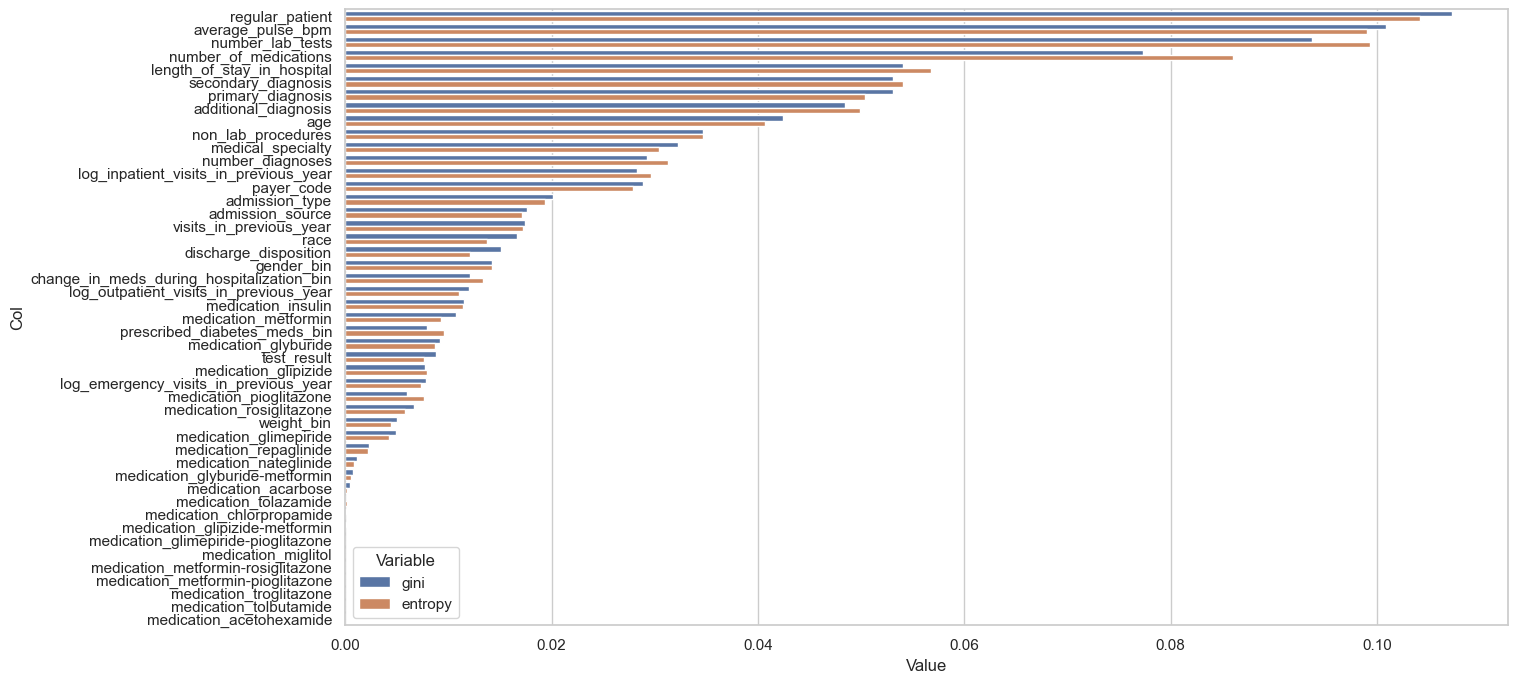

In [365]:
sns.set(style="whitegrid")

gini_importance = DecisionTreeClassifier().fit(X_resampled, y_resampled).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_resampled, y_resampled).feature_importances_

zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_resampled.columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

In [366]:
selected_features_gini = []
selected_features_entropy = []
print("For GINI INDEX")
association_dict = dict(zip(gini_importance, X_train.columns))
for column, value in association_dict.items():
    if column > (100/47)/100:
        print(f"{column}: {value}")
        selected_features_gini.append(value)

print("-----------------------\n")
print("For ENTROPY IMPORTANCE")
association_dict_e = dict(zip(entropy_importance, X_train.columns))
for column, value in association_dict_e.items():
    if column > (100/47)/100:
        print(f"{column}: {value}")
        selected_features_entropy.append(value)
        
print("-----------------------\n")
print(set(selected_features_gini).intersection(set(selected_features_entropy)))
print(len(set(selected_features_gini).intersection(set(selected_features_entropy))))

For GINI INDEX
0.04242318023616718: age
0.02890350232705887: payer_code
0.03222044414163476: medical_specialty
0.10089254771809793: average_pulse_bpm
0.05406670510313967: length_of_stay_in_hospital
0.09371864887078647: number_lab_tests
0.03465259602793923: non_lab_procedures
0.07735561661911748: number_of_medications
0.0530658625346268: primary_diagnosis
0.05308198320408648: secondary_diagnosis
0.04846039109642153: additional_diagnosis
0.029268450691075244: number_diagnoses
0.028281113704254627: log_inpatient_visits_in_previous_year
0.10730991024097448: regular_patient
-----------------------

For ENTROPY IMPORTANCE
0.04068737004825762: age
0.027934769480691738: payer_code
0.0303628623922052: medical_specialty
0.09898584166543228: average_pulse_bpm
0.056795784432977156: length_of_stay_in_hospital
0.099304036704041: number_lab_tests
0.03471589623081104: non_lab_procedures
0.08600530330927185: number_of_medications
0.05035602679199511: primary_diagnosis
0.05402939208761442: secondary_dia

In [367]:
dt_selected_features = set(selected_features_gini).intersection(set(selected_features_entropy))
dt_selected_features

{'additional_diagnosis',
 'age',
 'average_pulse_bpm',
 'length_of_stay_in_hospital',
 'log_inpatient_visits_in_previous_year',
 'medical_specialty',
 'non_lab_procedures',
 'number_diagnoses',
 'number_lab_tests',
 'number_of_medications',
 'payer_code',
 'primary_diagnosis',
 'regular_patient',
 'secondary_diagnosis'}

### Best Feature Selection ( intersection between all methods )

In [368]:
final_features = []

for i in lasso_selected_features:
    #print(i)
    final_features.append(i)
for i in rfe_selected_features:
    #print(i)
    final_features.append(i)
for i in dt_selected_features:
    #print(i)
    final_features.append(i)

In [369]:
feature_counts = Counter(final_features)

final_selected_features = [feature for feature, count in feature_counts.items() if count >= 2]

print(final_selected_features)
len(final_selected_features)

['race', 'age', 'payer_code', 'admission_type', 'medical_specialty', 'average_pulse_bpm', 'discharge_disposition', 'admission_source', 'length_of_stay_in_hospital', 'number_lab_tests', 'non_lab_procedures', 'number_of_medications', 'primary_diagnosis', 'secondary_diagnosis', 'additional_diagnosis', 'number_diagnoses', 'visits_in_previous_year', 'regular_patient', 'gender_bin', 'change_in_meds_during_hospitalization_bin', 'log_inpatient_visits_in_previous_year']


21

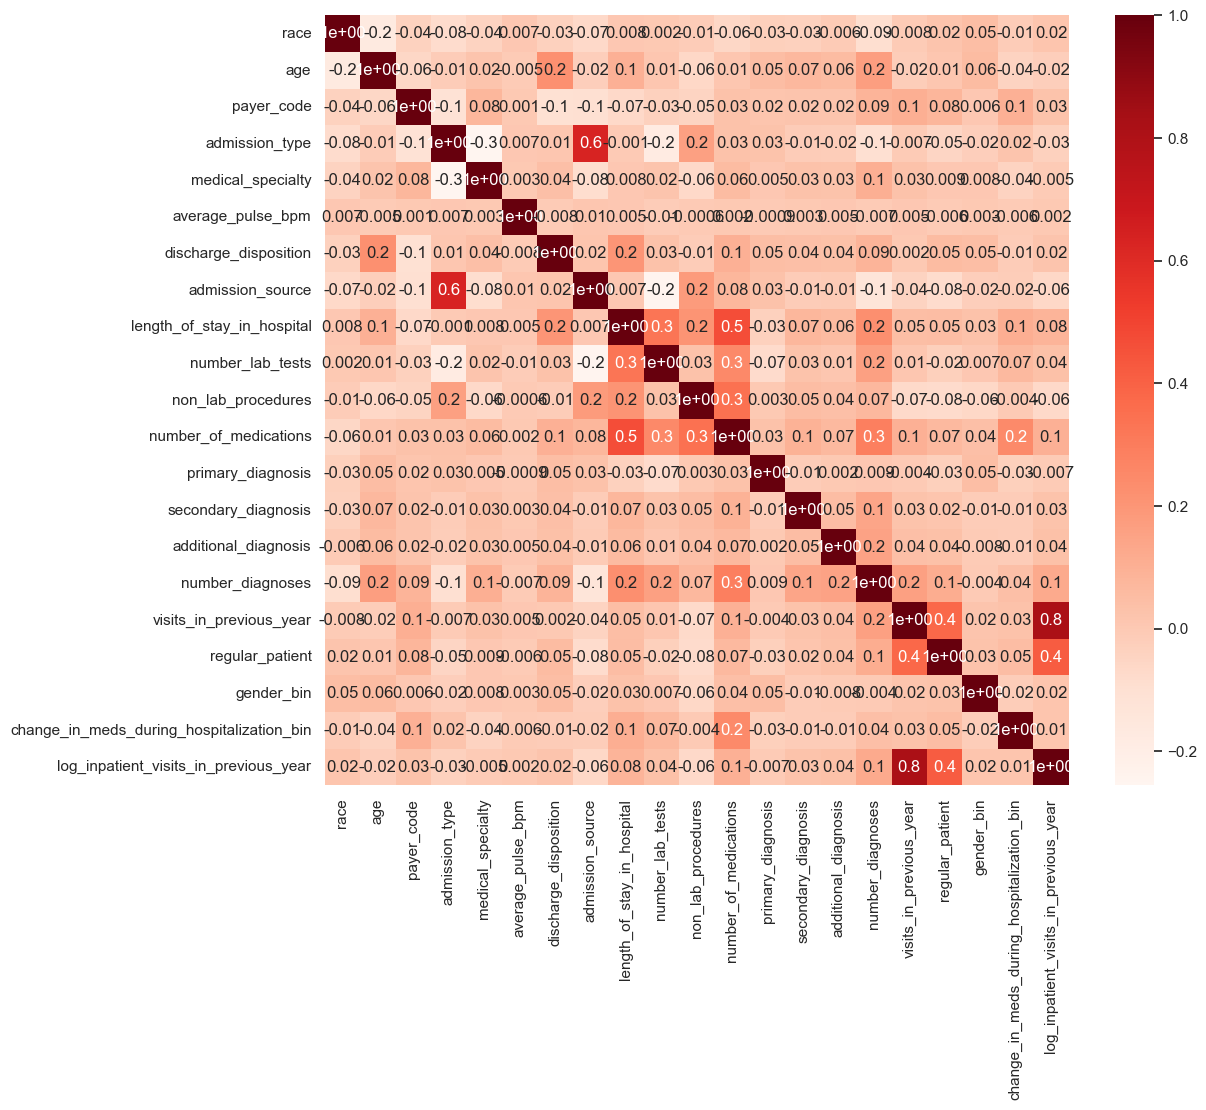

In [370]:
cor_heatmap(X_resampled[final_selected_features].corr(method="spearman"))

In [371]:
final_selected_features

['race',
 'age',
 'payer_code',
 'admission_type',
 'medical_specialty',
 'average_pulse_bpm',
 'discharge_disposition',
 'admission_source',
 'length_of_stay_in_hospital',
 'number_lab_tests',
 'non_lab_procedures',
 'number_of_medications',
 'primary_diagnosis',
 'secondary_diagnosis',
 'additional_diagnosis',
 'number_diagnoses',
 'visits_in_previous_year',
 'regular_patient',
 'gender_bin',
 'change_in_meds_during_hospitalization_bin',
 'log_inpatient_visits_in_previous_year']

## 3. Modeling Selection and Evaluation

In [372]:
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

rkf = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)

models = ['LogisticReg', 'KNN', 'DecisionTree', 'SVM', 'NaiveBayes', 'BaggingClassifier', 'RandomForest', 'AdaBoost', 'GradBoost', 'MLP']

models_train_score = {}
models_val_score = {}

for model in models:
    models_train_score[model] = []
    models_val_score[model] = []

for train_index, val_index in rkf.split(X_resampled, y_resampled):
    X_train, X_val = X_resampled.iloc[train_index], X_resampled.iloc[val_index]
    y_train, y_val = y_resampled.iloc[train_index], y_resampled.iloc[val_index]

    # Logistic Regression
    logistic_clf = LogisticRegression(random_state=42).fit(X_train, y_train)
    y_prob_train = logistic_clf.predict_proba(X_train)[:, 1]
    threshold = 0.4
    y_pred_train = (y_prob_train > threshold).astype(int)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    models_train_score['LogisticReg'].append(train_f1)

    # Evaluate on the validation set
    y_prob_val = logistic_clf.predict_proba(X_val)[:, 1]
    y_pred_val = (y_prob_val > threshold).astype(int)
    val_f1 = f1_score(y_val, y_pred_val, average='weighted')
    models_val_score['LogisticReg'].append(val_f1)

    # KNN
    KNN_clf = KNeighborsClassifier().fit(X_train, y_train)
    y_pred = KNN_clf.predict(X_train)
    models_train_score['KNN'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = KNN_clf.predict(X_val)
    models_val_score['KNN'].append(f1_score(y_val, y_pred, average='weighted'))

    # Decision Tree
    tree_clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
    y_pred = tree_clf.predict(X_train)
    models_train_score['DecisionTree'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = tree_clf.predict(X_val)
    models_val_score['DecisionTree'].append(f1_score(y_val, y_pred, average='weighted'))

    # SVM
    svm_clf = SVC(random_state=42).fit(X_train, y_train)
    y_pred = svm_clf.predict(X_train)
    models_train_score['SVM'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = svm_clf.predict(X_val)
    models_val_score['SVM'].append(f1_score(y_val, y_pred, average='weighted'))

    # GaussianNB
    nb_clf = GaussianNB().fit(X_train, y_train)
    y_pred = nb_clf.predict(X_train)
    models_train_score['NaiveBayes'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = nb_clf.predict(X_val)
    models_val_score['NaiveBayes'].append(f1_score(y_val, y_pred, average='weighted'))

    # BaggingClassifier
    bagging_clf = BaggingClassifier(random_state=42).fit(X_train, y_train)
    y_pred = bagging_clf.predict(X_train)
    models_train_score['BaggingClassifier'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = bagging_clf.predict(X_val)
    models_val_score['BaggingClassifier'].append(f1_score(y_val, y_pred, average='weighted'))

    # Random Forest
    forest_clf = RandomForestClassifier(random_state=42).fit(X_train, y_train)
    y_pred = forest_clf.predict(X_train)
    models_train_score['RandomForest'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = forest_clf.predict(X_val)
    models_val_score['RandomForest'].append(f1_score(y_val, y_pred, average='weighted'))

    # Adaptive Boosting with Decision Tree
    adaboost_clf = AdaBoostClassifier(random_state=42).fit(X_train, y_train)
    y_pred = adaboost_clf.predict(X_train)
    models_train_score['AdaBoost'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = adaboost_clf.predict(X_val)
    models_val_score['AdaBoost'].append(f1_score(y_val, y_pred, average='weighted'))

    # Gradient Boosting
    grad_clf = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
    y_pred = grad_clf.predict(X_train)
    models_train_score['GradBoost'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = grad_clf.predict(X_val)
    models_val_score['GradBoost'].append(f1_score(y_val, y_pred, average='weighted'))

    # MLP
    mlp_clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=42).fit(X_train, y_train)
    y_pred = mlp_clf.predict(X_train)
    models_train_score['MLP'].append(f1_score(y_train, y_pred, average='weighted'))

    y_pred = mlp_clf.predict(X_val)
    models_val_score['MLP'].append(f1_score(y_val, y_pred, average='weighted'))

# Print or analyze the results as needed
print("Train Scores:")
for model, scores in models_train_score.items():
    print(f"{model}: {sum(scores)/len(scores)}")

print("\nValidation Scores:")
for model, scores in models_val_score.items():
    print(f"{model}: {sum(scores)/len(scores)}")


Train Scores:
LogisticReg: 0.383641564069015
KNN: 0.6264025229159835
DecisionTree: 1.0
SVM: 0.5324034959797851
NaiveBayes: 0.2981949455391459
BaggingClassifier: 0.9809616514143968
RandomForest: 1.0
AdaBoost: 0.5178658419091382
GradBoost: 0.5535054114774878
MLP: 0.9289977379243558

Validation Scores:
LogisticReg: 0.382182414254839
KNN: 0.4568489717573381
DecisionTree: 0.4368666103380831
SVM: 0.49862180014211777
NaiveBayes: 0.29704175578021474
BaggingClassifier: 0.4877423721655595
RandomForest: 0.5158918716305795
AdaBoost: 0.5125376697703797
GradBoost: 0.5300544385875217
MLP: 0.4463770591571216


In [373]:
from sklearn.metrics import roc_curve, auc

# Assuming y_val is a multi-class target variable
classes = np.unique(y_val)

for class_label in classes:
    # Binary encoding for the current class
    y_multiclasses = (y_val == class_label).astype(int)

    # Calculate probabilities for each model
    prob_model_KNN = KNN_clf.predict_proba(X_val)[:, class_label]
    prob_model_DT = tree_clf.predict_proba(X_val)[:, class_label]
    prob_model_NB = nb_clf.predict_proba(X_val)[:, class_label]
    prob_model_BC = bagging_clf.predict_proba(X_val)[:, class_label]
    prob_model_RF = forest_clf.predict_proba(X_val)[:, class_label]
    prob_model_AB = adaboost_clf.predict_proba(X_val)[:, class_label]
    prob_model_GB = grad_clf.predict_proba(X_val)[:, class_label]
    prob_model_MLP = mlp_clf.predict_proba(X_val)[:, class_label]

    # Calculate ROC curve
    fpr_KNN, tpr_KNN, _ = roc_curve(y_multiclasses, prob_model_KNN)
    fpr_DT, tpr_DT, _ = roc_curve(y_multiclasses, prob_model_DT)
    fpr_NB, tpr_NB, _ = roc_curve(y_multiclasses, prob_model_NB)
    fpr_BC, tpr_BC, _ = roc_curve(y_multiclasses, prob_model_BC)
    fpr_RF, tpr_RF, _ = roc_curve(y_multiclasses, prob_model_RF)
    fpr_AB, tpr_AB, _ = roc_curve(y_multiclasses, prob_model_AB)
    fpr_GB, tpr_GB, _ = roc_curve(y_multiclasses, prob_model_GB)
    fpr_MLP, tpr_MLP, _ = roc_curve(y_multiclasses, prob_model_MLP)

    # Calculate AUC
    auc_KNN = auc(fpr_KNN, tpr_KNN)
    auc_DT = auc(fpr_DT, tpr_DT)
    auc_NB = auc(fpr_NB, tpr_NB)
    auc_BC = auc(fpr_BC, tpr_BC)
    auc_RF = auc(fpr_RF, tpr_RF)
    auc_AB = auc(fpr_AB, tpr_AB)
    auc_GB = auc(fpr_GB, tpr_GB)
    auc_MLP = auc(fpr_MLP, tpr_MLP)

    # Print or store the AUC values
    print(f"AUC for Class {class_label} - KNN: {auc_KNN}")
    print(f"AUC for Class {class_label} - Decision Tree: {auc_DT}")
    print(f"AUC for Class {class_label} - Naive Bayes: {auc_NB}")
    print(f"AUC for Class {class_label} - Bagging Classifier: {auc_BC}")
    print(f"AUC for Class {class_label} - Random Forest: {auc_RF}")
    print(f"AUC for Class {class_label} - AdaBoost: {auc_AB}")
    print(f"AUC for Class {class_label} - Gradient Boosting: {auc_GB}")
    print(f"AUC for Class {class_label} - MLP: {auc_MLP}")


AUC for Class 0 - KNN: 0.7432442594398436
AUC for Class 0 - Decision Tree: 0.6306841612450939
AUC for Class 0 - Naive Bayes: 0.74094423502053
AUC for Class 0 - Bagging Classifier: 0.7724706200079888
AUC for Class 0 - Random Forest: 0.8160384757820245
AUC for Class 0 - AdaBoost: 0.7894606404328849
AUC for Class 0 - Gradient Boosting: 0.8253113462480777
AUC for Class 0 - MLP: 0.7061806738113373
AUC for Class 1 - KNN: 0.6236744738549793
AUC for Class 1 - Decision Tree: 0.5701810629608464
AUC for Class 1 - Naive Bayes: 0.65429224996012
AUC for Class 1 - Bagging Classifier: 0.6555939642582241
AUC for Class 1 - Random Forest: 0.7043811475219418
AUC for Class 1 - AdaBoost: 0.7022005244026904
AUC for Class 1 - Gradient Boosting: 0.7145435791645178
AUC for Class 1 - MLP: 0.5957847997559189
AUC for Class 2 - KNN: 0.5609607531688511
AUC for Class 2 - Decision Tree: 0.5299998573303658
AUC for Class 2 - Naive Bayes: 0.5956576119005498
AUC for Class 2 - Bagging Classifier: 0.5871152675531206
AUC for

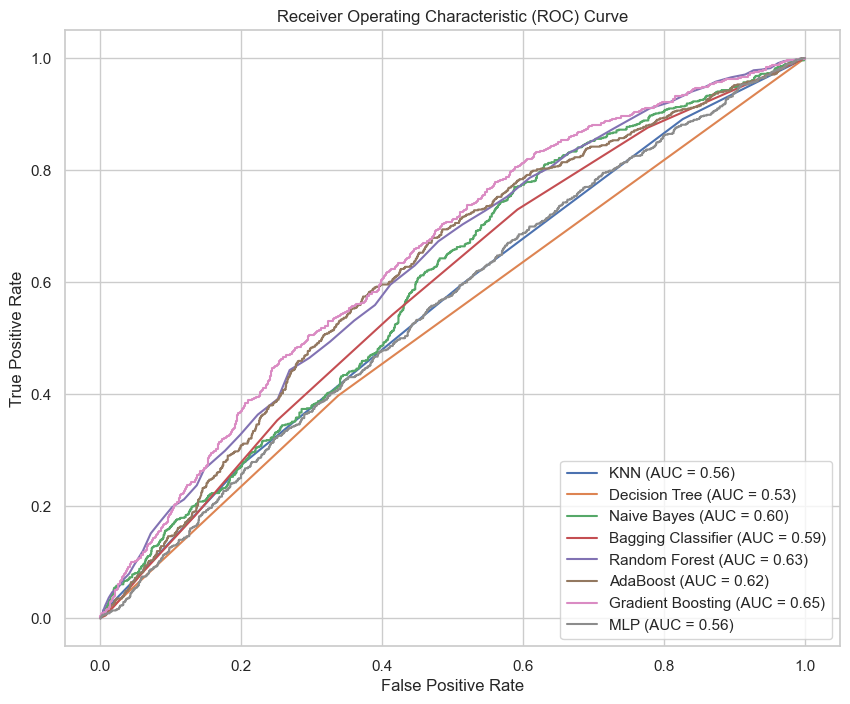

In [374]:
plt.figure(figsize=(10, 8))

# Plot ROC curves for each model
plt.plot(fpr_KNN, tpr_KNN, label='KNN (AUC = {:.2f})'.format(auc_KNN))
plt.plot(fpr_DT, tpr_DT, label='Decision Tree (AUC = {:.2f})'.format(auc_DT))
plt.plot(fpr_NB, tpr_NB, label='Naive Bayes (AUC = {:.2f})'.format(auc_NB))
plt.plot(fpr_BC, tpr_BC, label='Bagging Classifier (AUC = {:.2f})'.format(auc_BC))
plt.plot(fpr_RF, tpr_RF, label='Random Forest (AUC = {:.2f})'.format(auc_RF))
plt.plot(fpr_AB, tpr_AB, label='AdaBoost (AUC = {:.2f})'.format(auc_AB))
plt.plot(fpr_GB, tpr_GB, label='Gradient Boosting (AUC = {:.2f})'.format(auc_GB))
plt.plot(fpr_MLP, tpr_MLP, label='MLP (AUC = {:.2f})'.format(auc_MLP))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [375]:
df = show_models_results(models_train_score, models_val_score)
df

,Train,Val
LogisticReg,0.384+/-0.0,0.382+/-0.01
KNN,0.626+/-0.0,0.457+/-0.01
DecisionTree,1.0+/-0.0,0.437+/-0.01
SVM,0.532+/-0.0,0.499+/-0.01
NaiveBayes,0.298+/-0.04,0.297+/-0.04
BaggingClassifier,0.981+/-0.0,0.488+/-0.01
RandomForest,1.0+/-0.0,0.516+/-0.01
AdaBoost,0.518+/-0.0,0.513+/-0.01
GradBoost,0.554+/-0.0,0.53+/-0.01
MLP,0.929+/-0.0,0.446+/-0.01


In [376]:
rf_clf = RandomForestClassifier(random_state=42,criterion="gini", n_estimators=100, max_depth=2, min_samples_split=2, min_samples_leaf=4)
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)

ensemble_clf = VotingClassifier(
        estimators=[
            ('random_forest', rf_clf),
            ('gradient_boosting', gb_clf)
        ],
        voting='soft'  # 'soft' for using predicted class probabilities, 'hard' for majority voting
    )

ensemble_clf.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_val_pred = ensemble_clf.predict(X_val)

# Evaluate the model performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Display the scores and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.5514

Confusion Matrix:
[[595 108  59]
 [175 436 220]
 [232 276 284]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       762
           1       0.53      0.52      0.53       831
           2       0.50      0.36      0.42       792

    accuracy                           0.55      2385
   macro avg       0.54      0.55      0.54      2385
weighted avg       0.54      0.55      0.54      2385



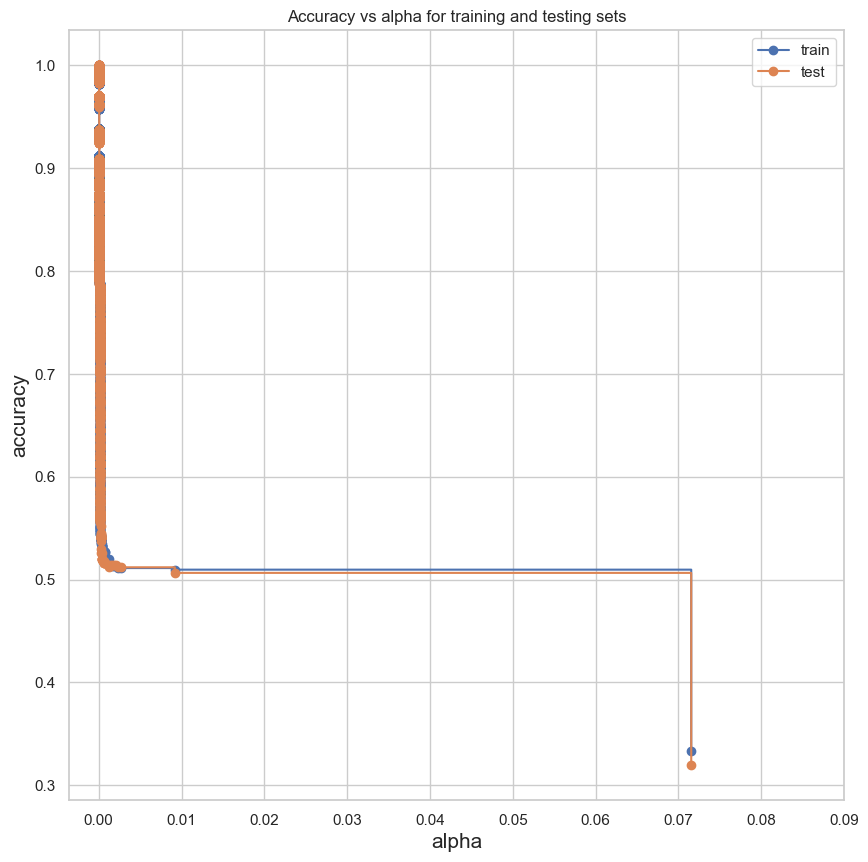

In [377]:
dt_alpha = DecisionTreeClassifier(random_state=42)
path = dt_alpha.cost_complexity_pruning_path(X_resampled, y_resampled)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

trees = []
for ccp_alpha in ccp_alphas:
    dt_alpha = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_resampled, y_resampled)
    trees.append(dt_alpha)

train_scores = [tree.score(X_resampled, y_resampled) for tree in trees]
test_scores = [tree.score(X_val, y_val) for tree in trees]

fig, ax = plt.subplots(figsize = (10,10))
ax.set_xlabel("alpha", fontsize=15)
ax.set_ylabel("accuracy", fontsize=15)
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
plt.xticks(np.arange(0,0.1,0.01))
ax.legend()
plt.show()

In [378]:
index_best_model = np.argmax(test_scores)
best_model = trees[index_best_model]
print('ccp_alpha of best model: ',trees[index_best_model])
print('_____________________________________________________________')
print('Training accuracy of best model: ',best_model.score(X_resampled, y_resampled))
print('Test accuracy of best model: ',best_model.score(X_val, y_val))

ccp_alpha of best model:  DecisionTreeClassifier(random_state=42)
_____________________________________________________________
Training accuracy of best model:  1.0
Test accuracy of best model:  1.0


In [379]:
# create a splitter object
rkfold = RepeatedKFold(n_splits=10, n_repeats=2, random_state=42)
# define your model (any model)
dt_model = DecisionTreeClassifier(ccp_alpha= 0.063,criterion="gini", max_depth=2, min_samples_split=2, min_samples_leaf=4)
# pass your model and KFold object to cross_val_score
# to fit and get the mse of each fold of data

for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(dt_model,
                            X_resampled, y_resampled,
                            cv=skfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")

accuracy: 0.509643605870021
recall: nan
precision: nan
f1: nan


## Logistic Regression

In [385]:
# Create the model
log_reg2 = LogisticRegression()

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)

log_reg2 = LogisticRegression()
for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(log_reg2,
                            X_resampled, y_resampled,
                            cv=skfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")

accuracy: 0.5248637316561844
recall: nan
precision: nan
f1: nan


## AdaBoostClassifier

In [390]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import precision_recall_fscore_support

# Create a stratified K-fold splitter
skfold = StratifiedKFold(n_splits=10)

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

scoring_metrics = ["accuracy", "recall", "precision", "f1"]
cv_results = cross_validate(clf, X_resampled, y_resampled, cv=skfold, scoring=scoring_metrics)

for metric in scoring_metrics:
    if metric in ["recall", "precision", "f1"]:
        scores = precision_recall_fscore_support(y_resampled, clf.fit(X_resampled, y_resampled).predict(X_resampled), average='weighted')
        print(f"{metric}: {scores[0]:.4f}")
    else:
        print(f"{metric}: {cv_results['test_'+metric].mean():.4f}")


accuracy: 0.5298
recall: 0.5250
precision: 0.5250
f1: 0.5250


## GradientBoostingClassifier

In [382]:
gbc = GradientBoostingClassifier(n_estimators=600, learning_rate=1.0, max_depth=1, random_state=0)

# create a splitter object
skfold = StratifiedKFold(n_splits = 10)

for score in ["accuracy", "recall", "precision", "f1"]:
  cv_score = cross_val_score(gbc,
                            X_resampled, y_resampled,
                            cv=skfold,
                            scoring=score)

  print(f"{score}: {cv_score.mean()}")

accuracy: 0.5350104821802935
recall: nan
precision: nan
f1: nan


### RandomForest

In [383]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42,criterion="gini",ccp_alpha=0.015, n_estimators=100, max_depth=2, min_samples_split=2, min_samples_leaf=4)

# Train the model on the training split
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

# Display the scores and confusion matrix
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
# Kaggle: 0.31 sem RFE I didnt used grid and with split data at 0.1 test

Accuracy: 0.5136

Confusion Matrix:
[[593 169   0]
 [199 632   0]
 [261 531   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.78      0.65       762
           1       0.47      0.76      0.58       831
           2       0.00      0.00      0.00       792

    accuracy                           0.51      2385
   macro avg       0.35      0.51      0.41      2385
weighted avg       0.35      0.51      0.41      2385



In [384]:
end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")

Execution time: 7860.995682001114 seconds
